In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path

Tekstiä

In [ ]:
study_area = gpd.read_file('../data/studyarea.geojson')
mtk_path = Path('../data/mtk/')

# Wrangle and clip topographic databases

## 2005

Topographic database from 2005 is split into map sheets, and each of those contain several `shp` files. Our study is fully covered in four map sheets, `M21O4D`, `M2104C`, `M20O2B` and `M20O2A`. In addition, this dataset ins in `EPSG:2393` coordinates. 

In [ ]:
sheets = [s for s in os.listdir(mtk_path/'2005') if os.path.isdir(mtk_path/'2005'/s)]

### Fields

Fields are found on files with template `M<sheetid>P`, and the class id is `32611`.

In [ ]:
fields = None
for s in sheets:
    temp = gpd.read_file(mtk_path/'2005'/s/f'M{s[1:]}P.SHP')
    temp = temp[temp.LUOKKA == 32611]
    if fields is None: fields = temp
    else: fields = pd.concat([fields, temp])

In [ ]:
fields = fields.to_crs('EPSG:3067')
fields = fields.clip(study_area.iloc[0].geometry)

/opt/conda/lib/python3.9/site-packages/geopandas/tools/clip.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


<AxesSubplot: >

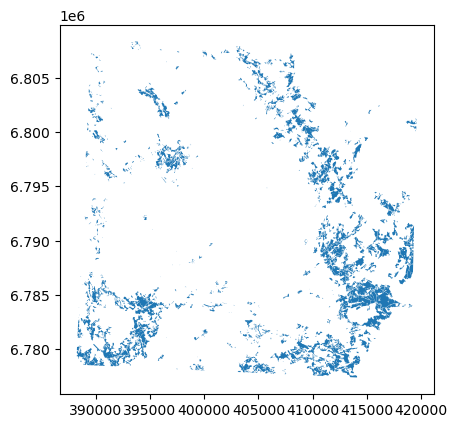

In [ ]:
fields.plot()

In [ ]:
fields.to_file(mtk_path/'2005'/'fields.geojson')

### Roads

Roads are found on files with template `L<sheetid>V`, and the class ids are `12111`, `12112`, `12121`, `12122`, `12131` and `12132`.

In [ ]:
roads = None
for s in sheets:
    temp = gpd.read_file(mtk_path/'2005'/s/f'L{s[1:]}V.SHP')
    temp = temp[temp.LUOKKA.isin([12111,12112,12121,12112,12131,12132])]
    if roads is None: roads = temp
    else: roads = pd.concat([roads, temp])

In [ ]:
roads = roads.to_crs('EPSG:3067')
roads = roads.clip(study_area.iloc[0].geometry)

/opt/conda/lib/python3.9/site-packages/geopandas/tools/clip.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


<AxesSubplot: >

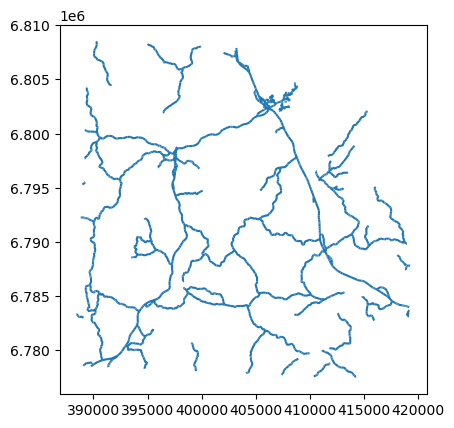

In [ ]:
roads.plot()

In [ ]:
roads.to_file(mtk_path/'2005'/'roads.geojson')

### Marshes

Marshes are found on files with template `M<sheetid>P`, and the class ids are `35411`, `35412`, `35421` and `35422`.

In [ ]:
marshes = None
for s in sheets:
    temp = gpd.read_file(mtk_path/'2005'/s/f'M{s[1:]}P.SHP')
    temp = temp[temp.LUOKKA.isin([35411,35412,35421,35422])]
    if marshes is None: marshes = temp
    else: marshes = pd.concat([marshes, temp])

In [ ]:
marshes = marshes.to_crs('EPSG:3067')
marshes = marshes.clip(study_area.iloc[0].geometry)

/opt/conda/lib/python3.9/site-packages/geopandas/tools/clip.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


<AxesSubplot: >

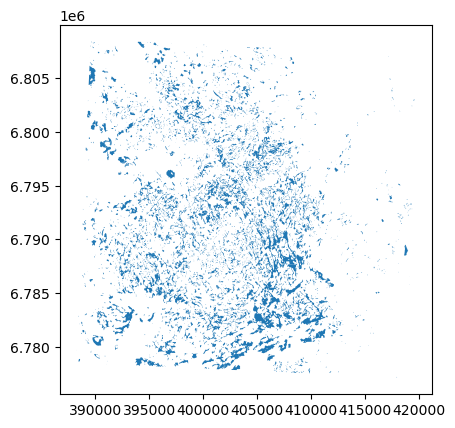

In [ ]:
marshes.plot()

In [ ]:
marshes.to_file(mtk_path/'2005'/'marshes.geojson')

### Waterways

Waterways are found on files with template `M<sheetid>V`, class ids are `36311` and `36312`.

In [ ]:
waterways = None
for s in sheets:
    temp = gpd.read_file(mtk_path/'2005'/s/f'M{s[1:]}V.SHP')
    temp = temp[temp.LUOKKA.isin([36311,36312])]
    if waterways is None: waterways = temp
    else: waterways = pd.concat([waterways, temp])

In [ ]:
waterways = waterways.to_crs('EPSG:3067')
waterways = waterways.clip(study_area.iloc[0].geometry)

/opt/conda/lib/python3.9/site-packages/geopandas/tools/clip.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


<AxesSubplot: >

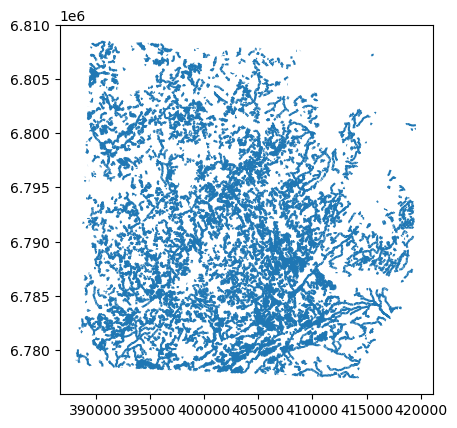

In [ ]:
waterways.plot()

In [ ]:
waterways.to_file(mtk_path/'2005'/'waterways.geojson')

### Water bodies

Water bodies area on files with template `M<sheetid>P`, class ids are `36200`.

In [ ]:
waterbodies = None
for s in sheets:
    temp = gpd.read_file(mtk_path/'2005'/s/f'M{s[1:]}P.SHP')
    temp = temp[temp.LUOKKA.isin([36200])]
    if waterbodies is None: waterbodies = temp
    else: waterbodies = pd.concat([waterbodies, temp])

In [ ]:
waterbodies = waterbodies.to_crs('EPSG:3067')
waterbodies = waterbodies.clip(study_area.iloc[0].geometry)

/opt/conda/lib/python3.9/site-packages/geopandas/tools/clip.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


<AxesSubplot: >

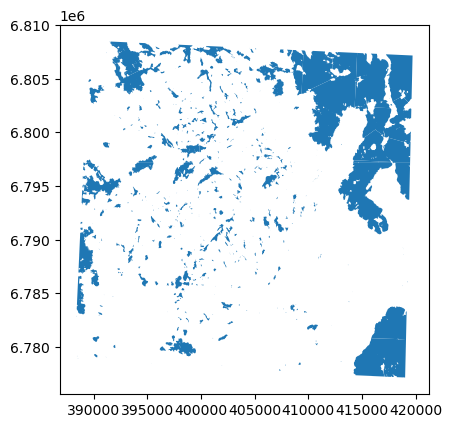

In [ ]:
waterbodies.plot()

In [ ]:
waterbodies.to_file(mtk_path/'2005'/'waterbodies.geojson')

## 2022

Topographic database from 2022 is saved as a single geodatabases for whole Finland, and the databases are:

* MTK-kallio contains rocks and mineral soils
* MTK-korkeussuhteet contains altitude information
* MTK-maastokuvionreuna contains the edges for some classes
* MTK-muut contains the miscillaneous classes, such as meadows and arable land
* MTK-rakennus contains buildings
* MTK-suo contains marshes
* MTK-tie contains the road networks
* MTK-vakavesi contains all water bodies
* MTK-virtavesi contains all waterways

Our analyses require the usage of `MTK-muut`, `MTK-suo`, `MTK-tie`, `MTK-vakavesi` and `MTK-virtavesi`. The class ids are the same as in 2005, and the clipping is done beforehand with QGIS.

# Change analyses

Change analyses can be done with either raster data or polygon data. Working with polygon data is much easier, as newer topographical databases are also polygon data.

In [ ]:
import fiona
from rasterio import features
from rasterio.enums import Resampling
import rasterio as rio

def polygonize(fn, outpath, target_class, scale_factor=1):
    with rio.open(fn) as src:
        im = src.read(out_shape=(src.count, int(src.height*scale_factor),int(src.width*scale_factor)),
                      resampling=Resampling.mode)[target_class -1]
        im[im !=  0] = 1
        mask = im == 1
        tfm = src.transform * src.transform.scale((src.width/im.shape[-1]), (src.height/im.shape[-2]))
        results = ({'properties': {'raster_val': v}, 'geometry': s}
                   for i, (s, v) in enumerate(features.shapes(im, mask==mask, transform=tfm))
                   if v == 1)
        with fiona.open(outpath, 'w', driver='GeoJSON',
                        crs='EPSG:3067',
                        schema={'properties': [('raster_val', 'int')],
                                'geometry': 'Polygon'}) as dst:
            dst.writerecords(results)

Also, as the maps are not perfectly aligned, the analysis is done by aggregating the data into a rectangular grid.

In [ ]:
from itertools import product
from shapely.geometry import Polygon
import numpy as np

def make_grid(area, cell):
    xmin, ymin, xmax, ymax = area.total_bounds
    
    cols = list(np.arange(xmin, xmax+cell, cell))
    rows = list(np.arange(ymin, ymax+cell, cell))
    
    polys = []
    
    for x, y in product(cols[:-1], rows[:-1]):
        polys.append(Polygon([(x,y), (x+cell, y), (x+cell,y+cell),(x, y+cell)]))
    return gpd.GeoDataFrame({'geometry':polys}, crs=area.crs)

In [ ]:
respath = Path('../results/processed/')
results = os.listdir(respath)

## Fields

First polygonize the results.

In [ ]:
polypath = Path('../results/polygons/')
for r in results:
    polygonize(respath/r, polypath/'fields'/r.replace('tif', 'geojson'), target_class=1, scale_factor=1/2)

Then put them into a single dataframe

In [ ]:
fields_65 = None
fields_80s = None

for p in os.listdir(polypath/'fields'):
    union_gdf = gpd.read_file(polypath/'fields'/p)
    if '1965' in p:
        if fields_65 is None: fields_65 = union_gdf
        else: fields_65 = pd.concat((fields_65, union_gdf))
    else:
        if fields_80s is None: fields_80s = union_gdf
        else: fields_80s = pd.concat((fields_80s, union_gdf))
fields_65.reset_index(inplace=True, drop=True)
fields_80s.reset_index(inplace=True, drop=True)

Save the dataframes.

In [ ]:
fields_65.to_file(polypath/'fields_65.geojson')
fields_80s.to_file(polypath/'fields_80s.geojson')

In [ ]:
fields_05 = gpd.read_file(mtk_path/'2005/fields.geojson')
fields_22 = gpd.read_file(mtk_path/'2022/pellot_2022.geojson')

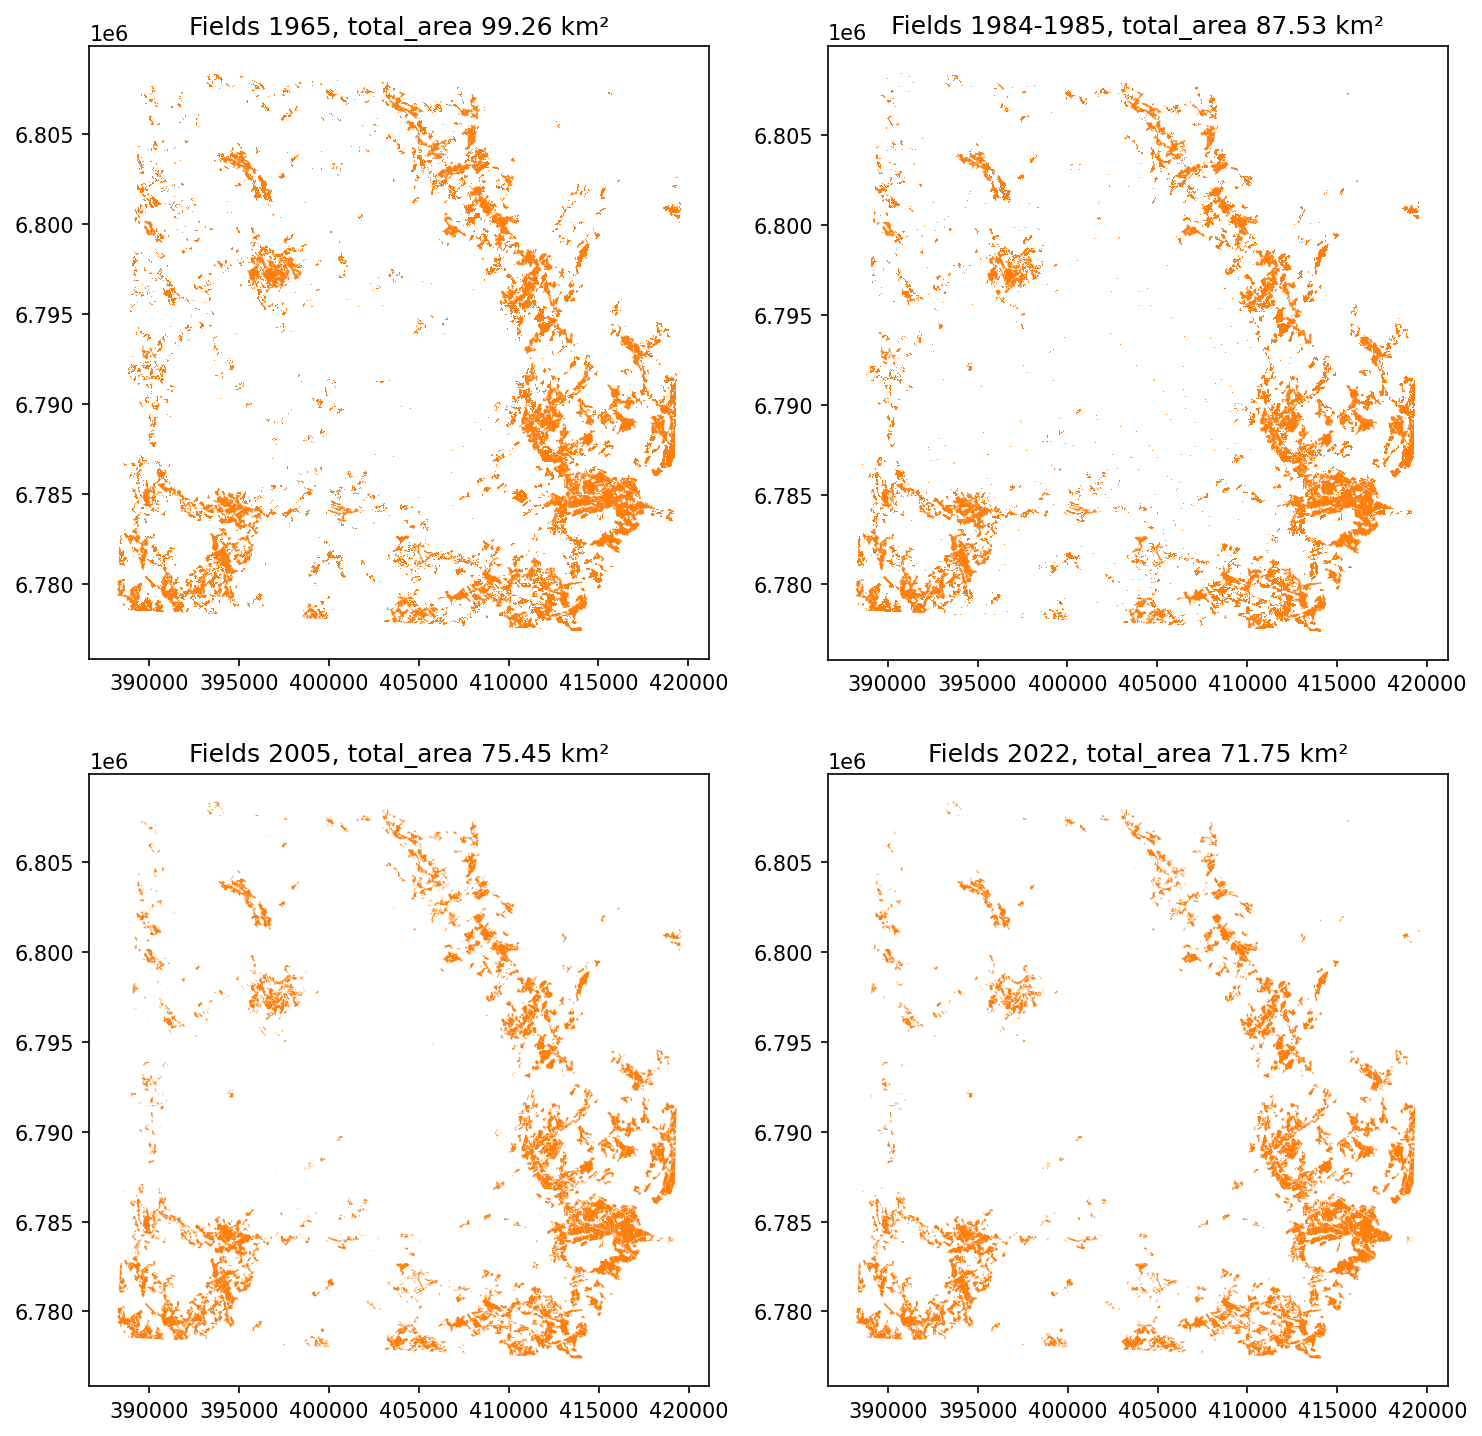

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(10,10), dpi=150)
fields_65.plot(ax=axs[0,0], color='tab:orange')
axs[0,0].set_title(f'Fields 1965, total_area {(fields_65.area.sum() * 10**-6):.2f} km²')
fields_80s.plot(ax=axs[0,1], color='tab:orange')
axs[0,1].set_title(f'Fields 1984-1985, total_area {(fields_80s.area.sum() * 10**-6):.2f} km²')
fields_05.plot(ax=axs[1,0], color='tab:orange')
axs[1,0].set_title(f'Fields 2005, total_area {(fields_05.area.sum() * 10**-6):.2f} km²')
fields_22.plot(ax=axs[1,1], color='tab:orange')
axs[1,1].set_title(f'Fields 2022, total_area {(fields_22.area.sum() * 10**-6):.2f} km²')

plt.tight_layout()

From 1965 to 2022, the total field area has decreased by almost 30 km². However, visualizing where the change has been most significant is rather difficult from the polygon data, so we aggregate the data into 500x500m grid.

In [ ]:
grid = make_grid(study_area, 500)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

def get_field_area(cell, fields, sindex):
    nearest_idx = list(sindex.nearest(cell.geometry.bounds))
    tempdata = fields.iloc[nearest_idx]
    return tempdata.clip(cell.geometry).area.sum() * 10**-6 # convert to square kms

In [ ]:
from tqdm import tqdm
tqdm.pandas()

In [ ]:
grid['field_area_65'] = grid.progress_apply(lambda cell: get_field_area(cell, fields_65, fields_65.sindex), axis=1)
grid['field_area_85'] = grid.progress_apply(lambda cell: get_field_area(cell, fields_80s, fields_80s.sindex), axis=1)
grid['field_area_05'] = grid.progress_apply(lambda cell: get_field_area(cell, fields_05, fields_05.sindex), axis=1)
grid['field_area_22'] = grid.progress_apply(lambda cell: get_field_area(cell, fields_22, fields_22.sindex), axis=1)

100%|████████████████████████████████████████████████████████████████████████████| 4032/4032 [00:16<00:00, 251.25it/s]


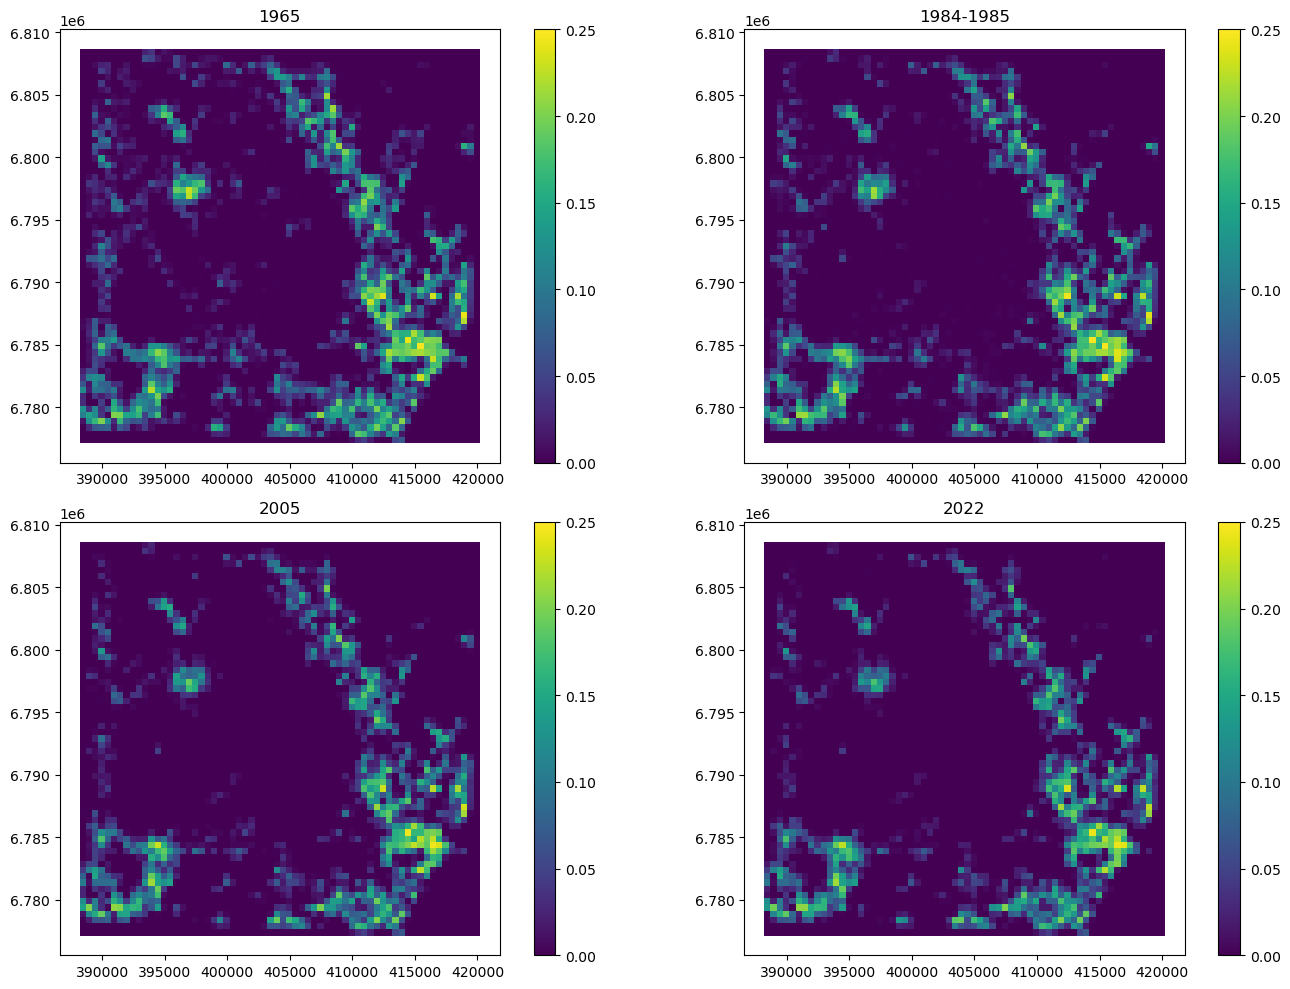

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(14,10))
grid.plot(column='field_area_65', ax=axs[0,0], vmin=0, vmax=.500**2, legend=True).set_title('1965')
grid.plot(column='field_area_85', ax=axs[0,1], vmin=0, vmax=.500**2, legend=True).set_title('1984-1985')
grid.plot(column='field_area_05', ax=axs[1,0], vmin=0, vmax=.500**2, legend=True).set_title('2005')
grid.plot(column='field_area_22', ax=axs[1,1], vmin=0, vmax=.500**2, legend=True).set_title('2022')
plt.tight_layout()

Quantify the change. Negative change means decreased field area.

In [ ]:
grid['field_change_85'] = (grid.field_area_85 - grid.field_area_65)
grid['field_change_05'] = (grid.field_area_05 - grid.field_area_85)
grid['field_change_22'] = (grid.field_area_22 - grid.field_area_05)

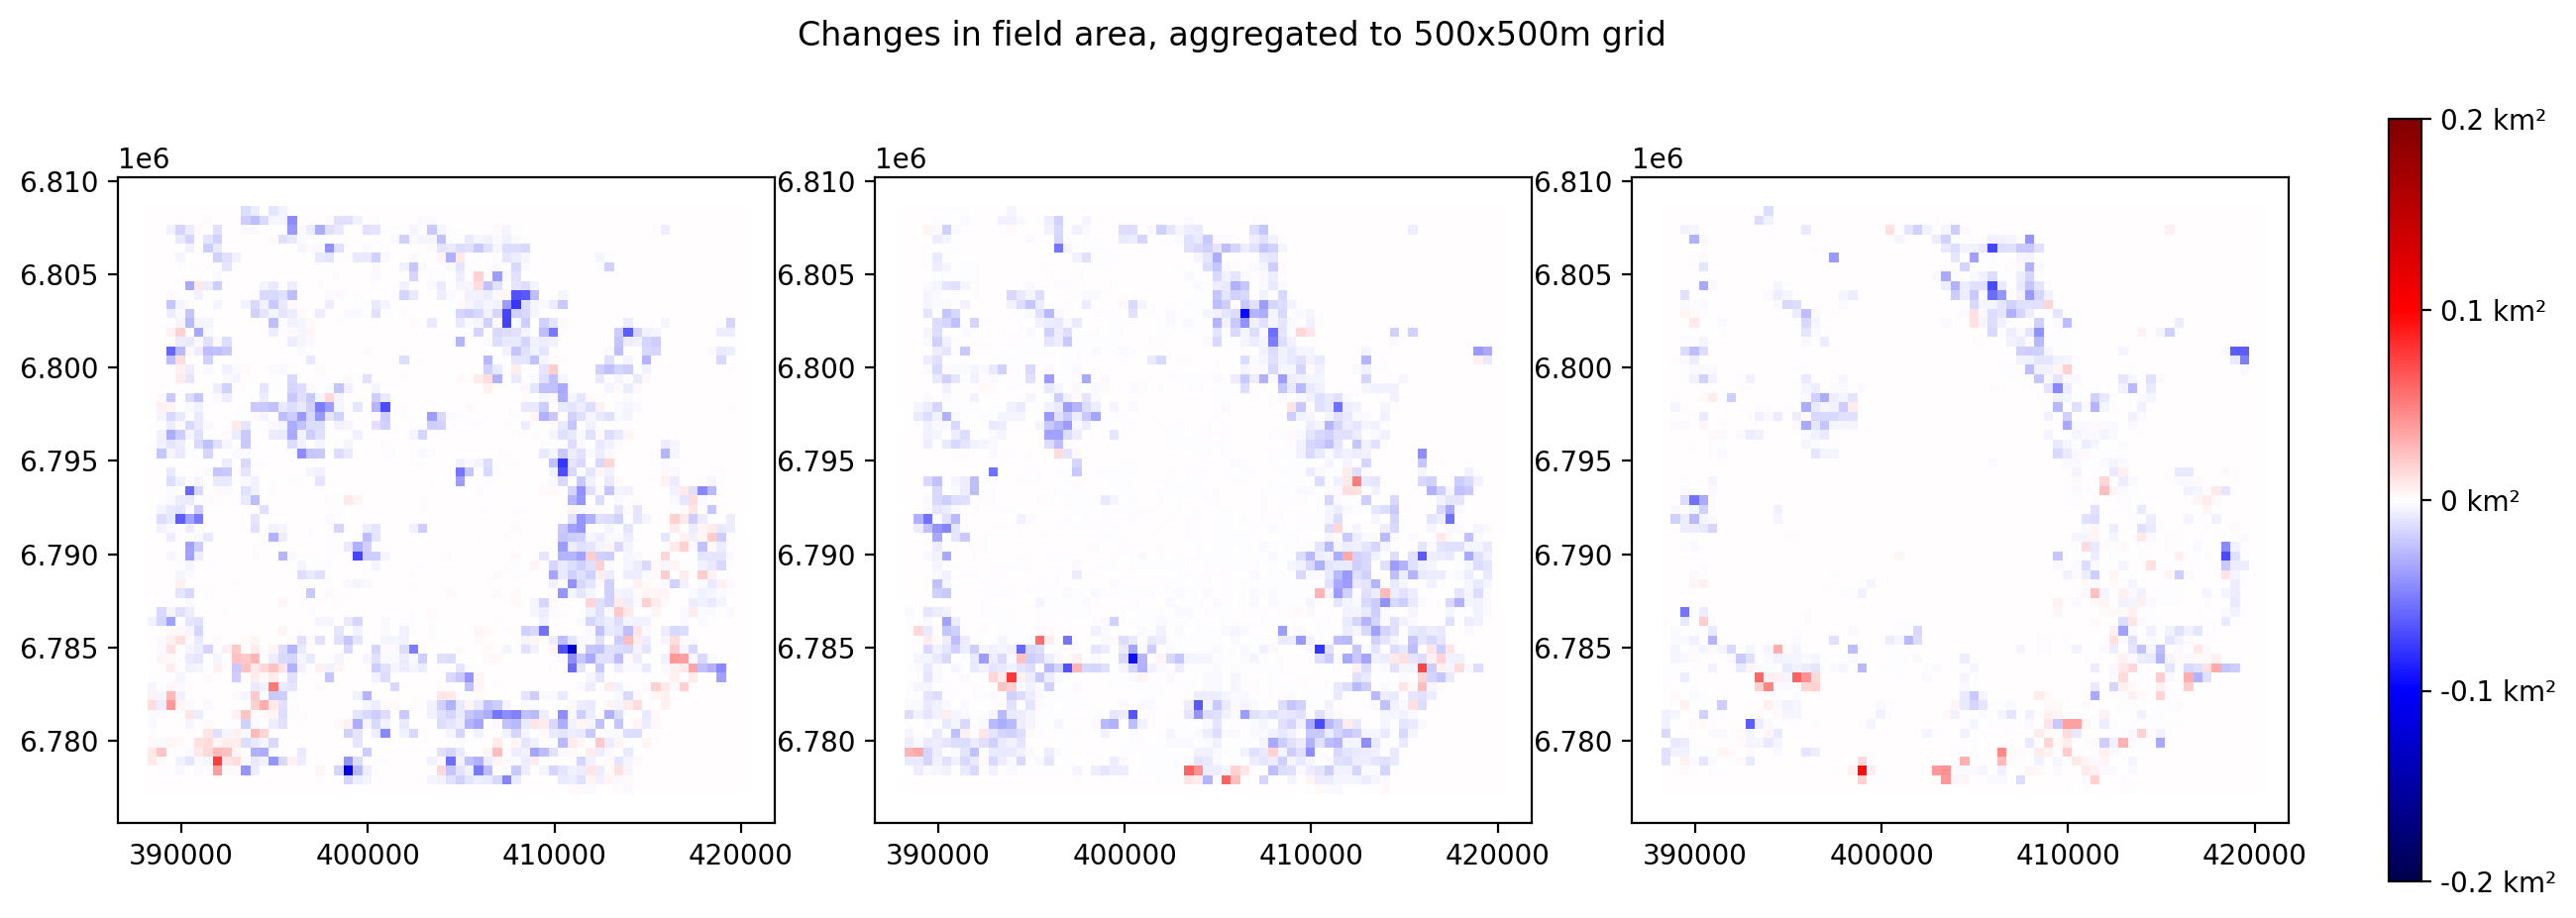

In [ ]:
fig,axs = plt.subplots(1,4, figsize=(15,5), dpi=200, gridspec_kw={'width_ratios': [1,1,1,0.05]})

grid.plot(column='field_change_85', cmap='seismic', vmin=-.20, vmax=.20, ax=axs[0])
grid.plot(column='field_change_05', cmap='seismic', vmin=-.20, vmax=.20, ax=axs[1])
grid.plot(column='field_change_22', cmap='seismic', vmin=-.20, vmax=.20, ax=axs[2])


norm = colors.Normalize(vmin=-.2,vmax=.2)
sm = plt.cm.ScalarMappable(cmap='seismic', norm=norm)
ticks = [-.2,-.1,0,.1,.2]
cbar = plt.colorbar(sm, cax=axs[3], ticks=ticks)
cbar.ax.set_yticklabels([f'{t} km²' for t in ticks])
plt.suptitle('Changes in field area, aggregated to 500x500m grid')
plt.show()

Visualize the location where the field area has decreased the most between 1965 and 1985.

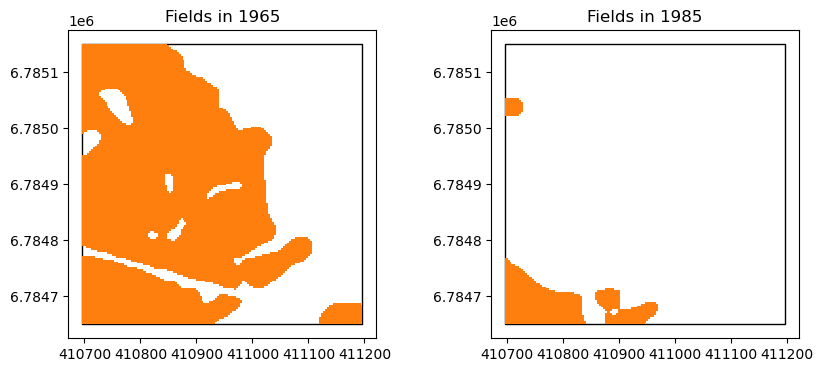

In [ ]:
fieldloss_85 = grid[grid.field_change_85 == grid.field_change_85.min()].geometry.iloc[0]
fig, axs = plt.subplots(1,2, figsize=(10,4))
grid[grid.field_change_85 == grid.field_change_85.min()].plot(ax=axs[0], facecolor='none')
fields_65.clip(fieldloss_85).plot(ax=axs[0], color='tab:orange').set_title('Fields in 1965')
grid[grid.field_change_85 == grid.field_change_85.min()].plot(ax=axs[1], facecolor='none')
fields_80s.clip(fieldloss_85).plot(ax=axs[1], color='tab:orange').set_title('Fields in 1985')
plt.show()

Same for 1985 and 2005

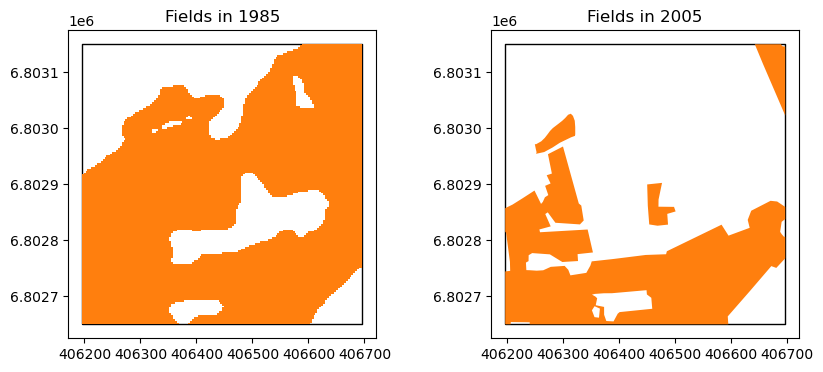

In [ ]:
fieldloss_05 = grid[grid.field_change_05 == grid.field_change_05.min()].geometry.iloc[0]
fig, axs = plt.subplots(1,2, figsize=(10,4))
grid[grid.field_change_05 == grid.field_change_05.min()].plot(ax=axs[0], facecolor='none')
fields_80s.clip(fieldloss_05).plot(ax=axs[0], color='tab:orange').set_title('Fields in 1985')
grid[grid.field_change_05 == grid.field_change_05.min()].plot(ax=axs[1], facecolor='none')
fields_05.clip(fieldloss_05).plot(ax=axs[1], color='tab:orange').set_title('Fields in 2005')
plt.show()

And then same visualizations for field area increase.

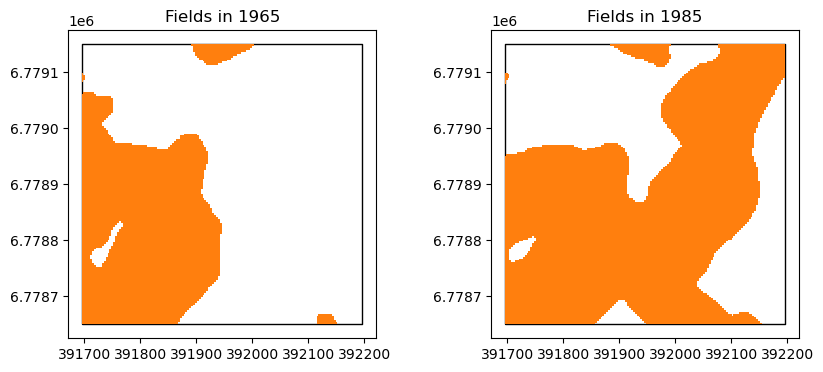

In [ ]:
fieldgain_85 = grid[grid.field_change_85 == grid.field_change_85.max()].geometry.iloc[0]
fig, axs = plt.subplots(1,2, figsize=(10,4))
grid[grid.field_change_85 == grid.field_change_85.max()].plot(ax=axs[0], facecolor='none')
grid[grid.field_change_85 == grid.field_change_85.max()].plot(ax=axs[1], facecolor='none')
fields_65.clip(fieldgain_85).plot(ax=axs[0], color='tab:orange').set_title('Fields in 1965')
fields_80s.clip(fieldgain_85).plot(ax=axs[1], color='tab:orange').set_title('Fields in 1985')
plt.show()

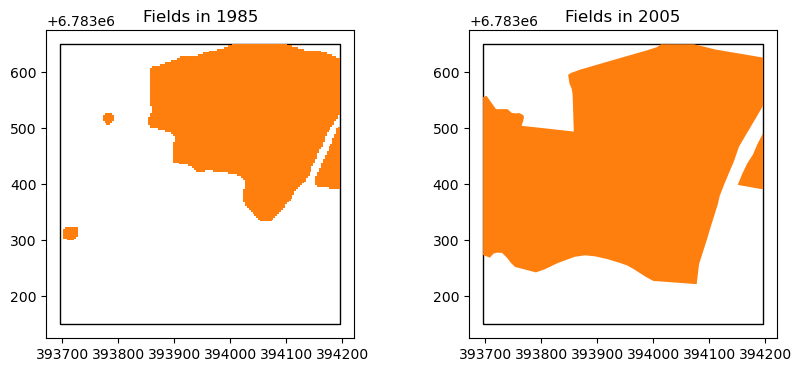

In [ ]:
fieldgain_05 = grid[grid.field_change_05 == grid.field_change_05.max()].geometry.iloc[0]
fig, axs = plt.subplots(1,2, figsize=(10,4))
grid[grid.field_change_05 == grid.field_change_05.max()].plot(ax=axs[0], facecolor='none')
fields_80s.clip(fieldgain_05).plot(ax=axs[0], color='tab:orange').set_title('Fields in 1985')
grid[grid.field_change_05 == grid.field_change_05.max()].plot(ax=axs[1], facecolor='none')
fields_05.clip(fieldgain_05).plot(ax=axs[1], color='tab:orange').set_title('Fields in 2005')
plt.show()

## Roads

In [ ]:
road_path = Path('../results/lines/roads/')

roads_65 = None
roads_80s = None

for p in os.listdir(road_path):
    union_gdf = gpd.read_file(road_path/p)
    if '1965' in p:
        if roads_65 is None: roads_65 = union_gdf
        else: roads_65 = pd.concat((roads_65, union_gdf))
    else:
        if roads_80s is None: roads_80s = union_gdf
        else: roads_80s = pd.concat((roads_80s, union_gdf))
roads_65.reset_index(drop=True, inplace=True)
roads_80s.reset_index(drop=True, inplace=True)

roads_05 = gpd.read_file(mtk_path/'2005/roads.geojson')
roads_22 = gpd.read_file(mtk_path/'2022/tiet_2022.geojson')
roads_22 = roads_22[roads_22.kohdeluokka.isin([12111,12112,12121,12112,12131,12132])]

For roads, we can see the overall change in the road networks.

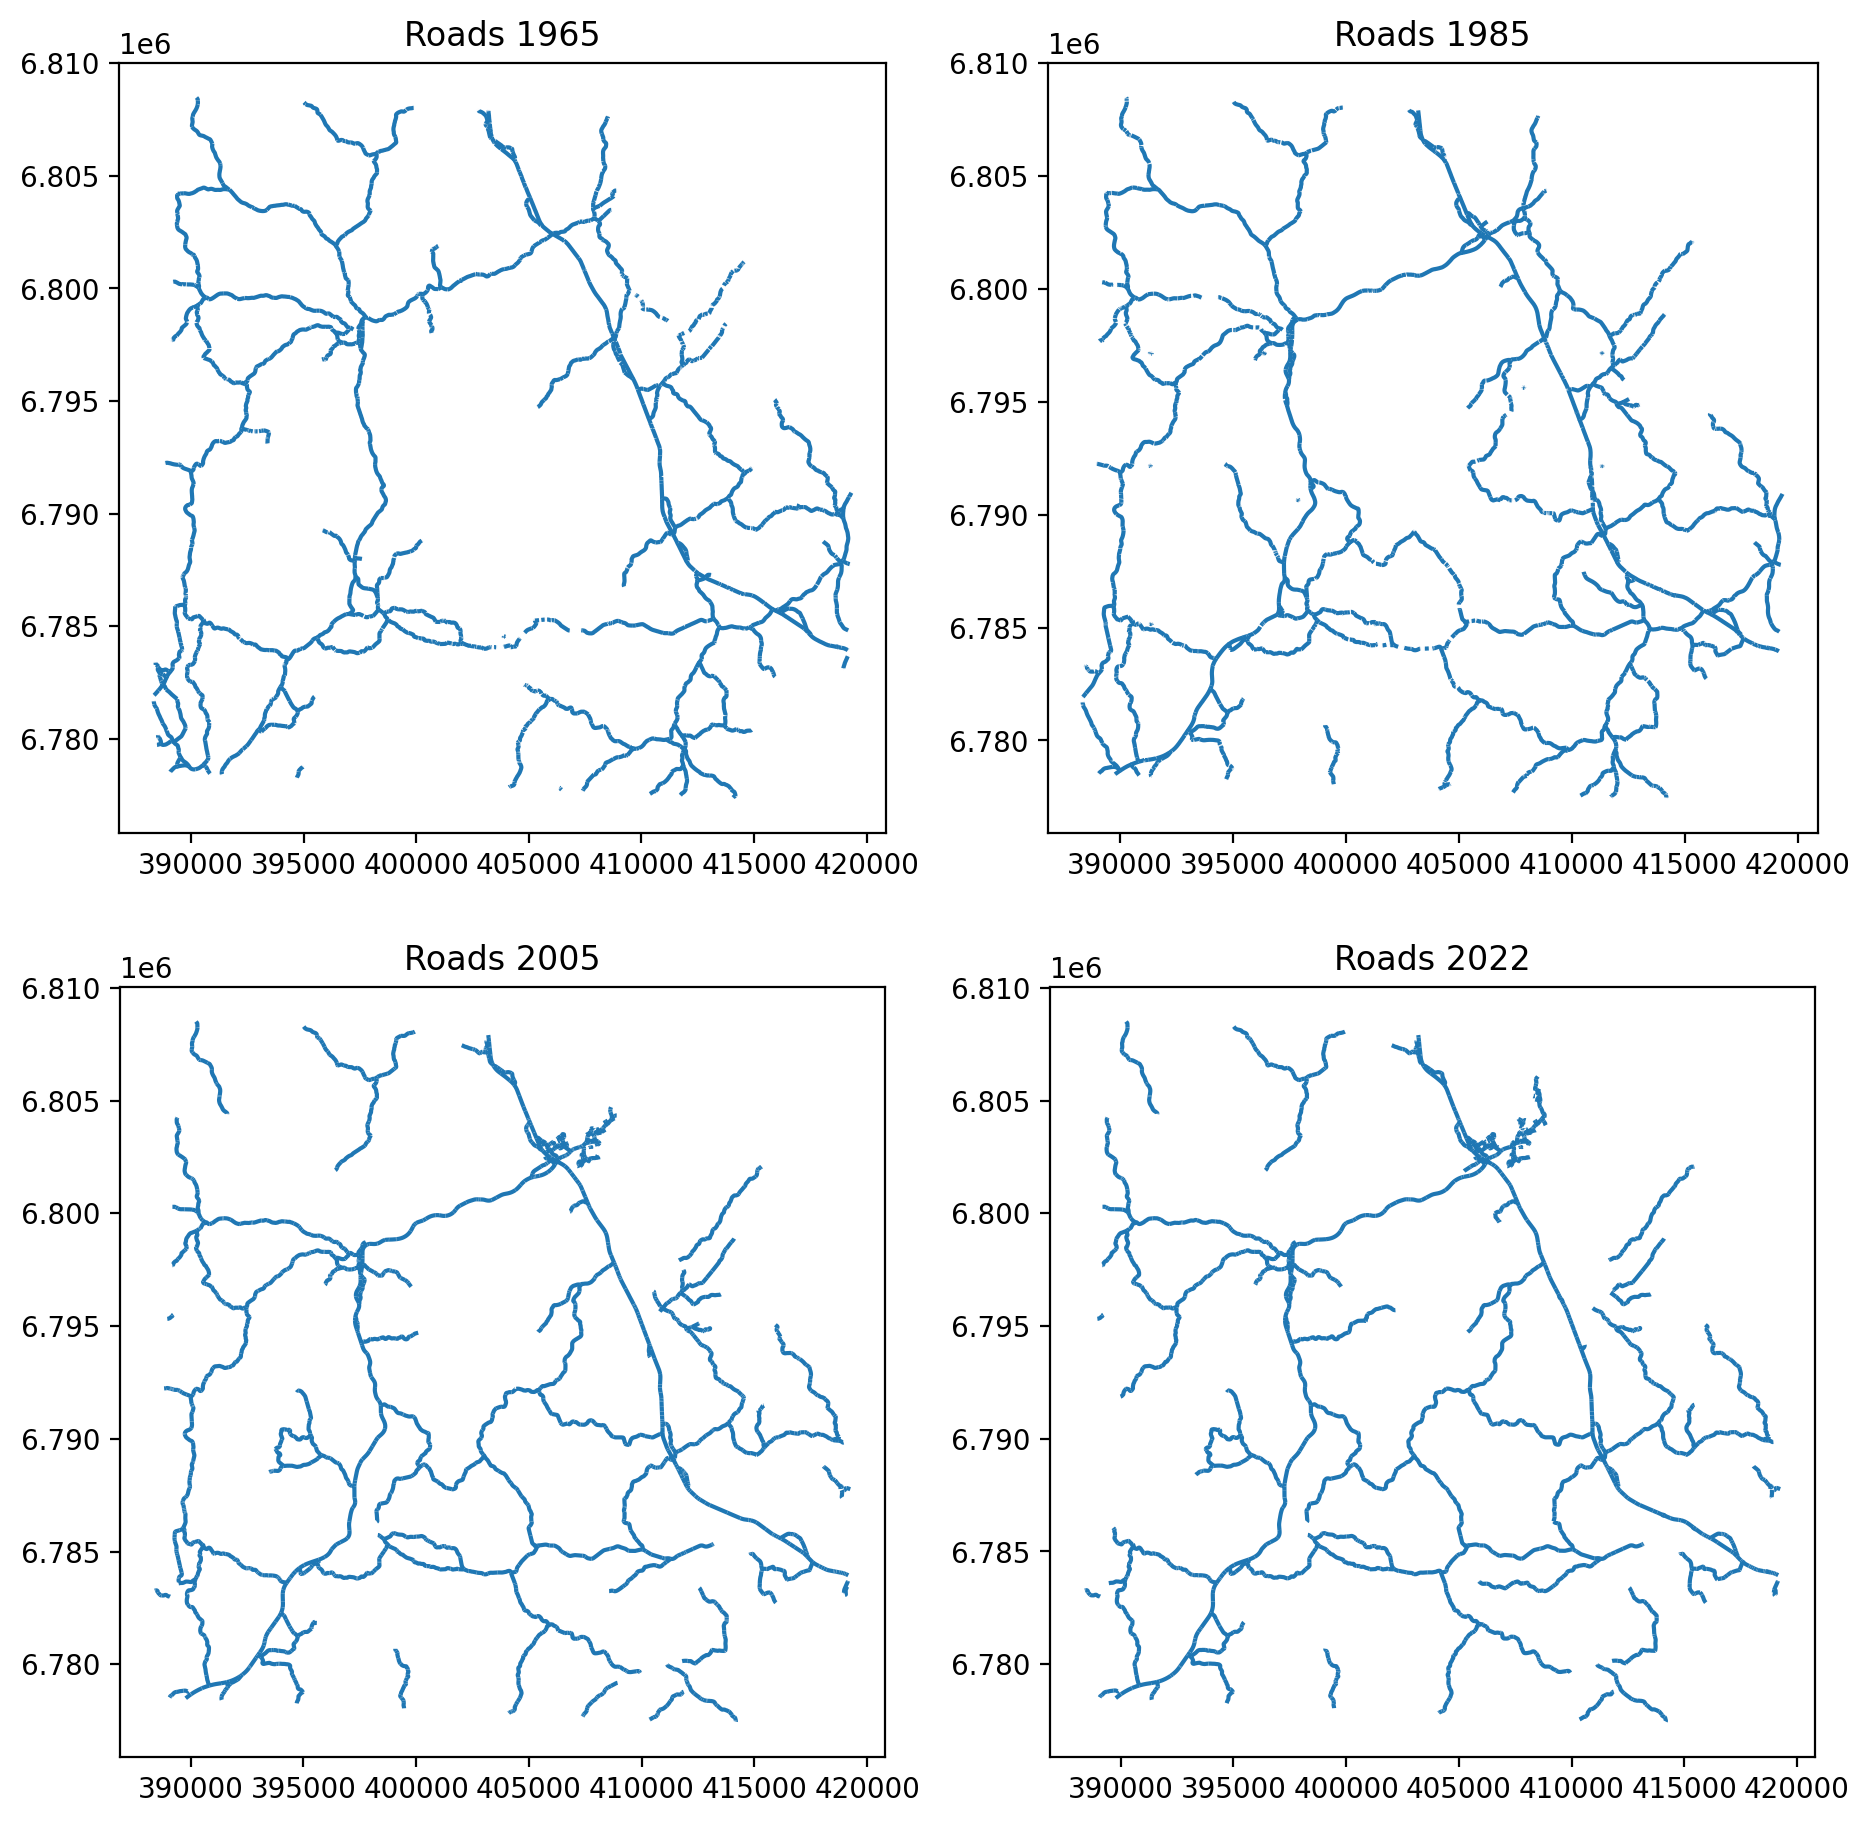

In [ ]:
fig, axs = plt.subplots(2,2, dpi=200, figsize=(11,11))

roads_65[roads_65.geometry.length > 100].plot(ax=axs[0,0])
roads_80s[roads_80s.geometry.length > 100].plot(ax=axs[0,1])
roads_05.plot(ax=axs[1,0])
roads_22.plot(ax=axs[1,1])
axs[0,0].set_title('Roads 1965')
axs[0,1].set_title('Roads 1985')
axs[1,0].set_title('Roads 2005')
axs[1,1].set_title('Roads 2022')
plt.show()

## Marshes

In [ ]:
for r in results:
    polygonize(respath/r, polypath/'marshes'/r.replace('tif', 'geojson'), target_class=2, scale_factor=1/2)

In [ ]:
marshes_65 = None
marshes_80s = None

for p in os.listdir(polypath/'marshes'):
    union_gdf = gpd.read_file(polypath/'marshes'/p)
    if '1965' in p:
        if marshes_65 is None: marshes_65 = union_gdf
        else: marshes_65 = pd.concat((marshes_65, union_gdf))
    else:
        if marshes_80s is None: marshes_80s = union_gdf
        else: marshes_80s = pd.concat((marshes_80s, union_gdf))
marshes_65.reset_index(inplace=True, drop=True)
marshes_80s.reset_index(inplace=True, drop=True)

In [ ]:
marshes_65.to_file(polypath/'marshes_65.geojson')
marshes_80s.to_file(polypath/'marshes_80s.geojson')

In [ ]:
marshes_05 = gpd.read_file(mtk_path/'2005/marshes.geojson')
marshes_22 = gpd.read_file(mtk_path/'2022/suot_2022.geojson')

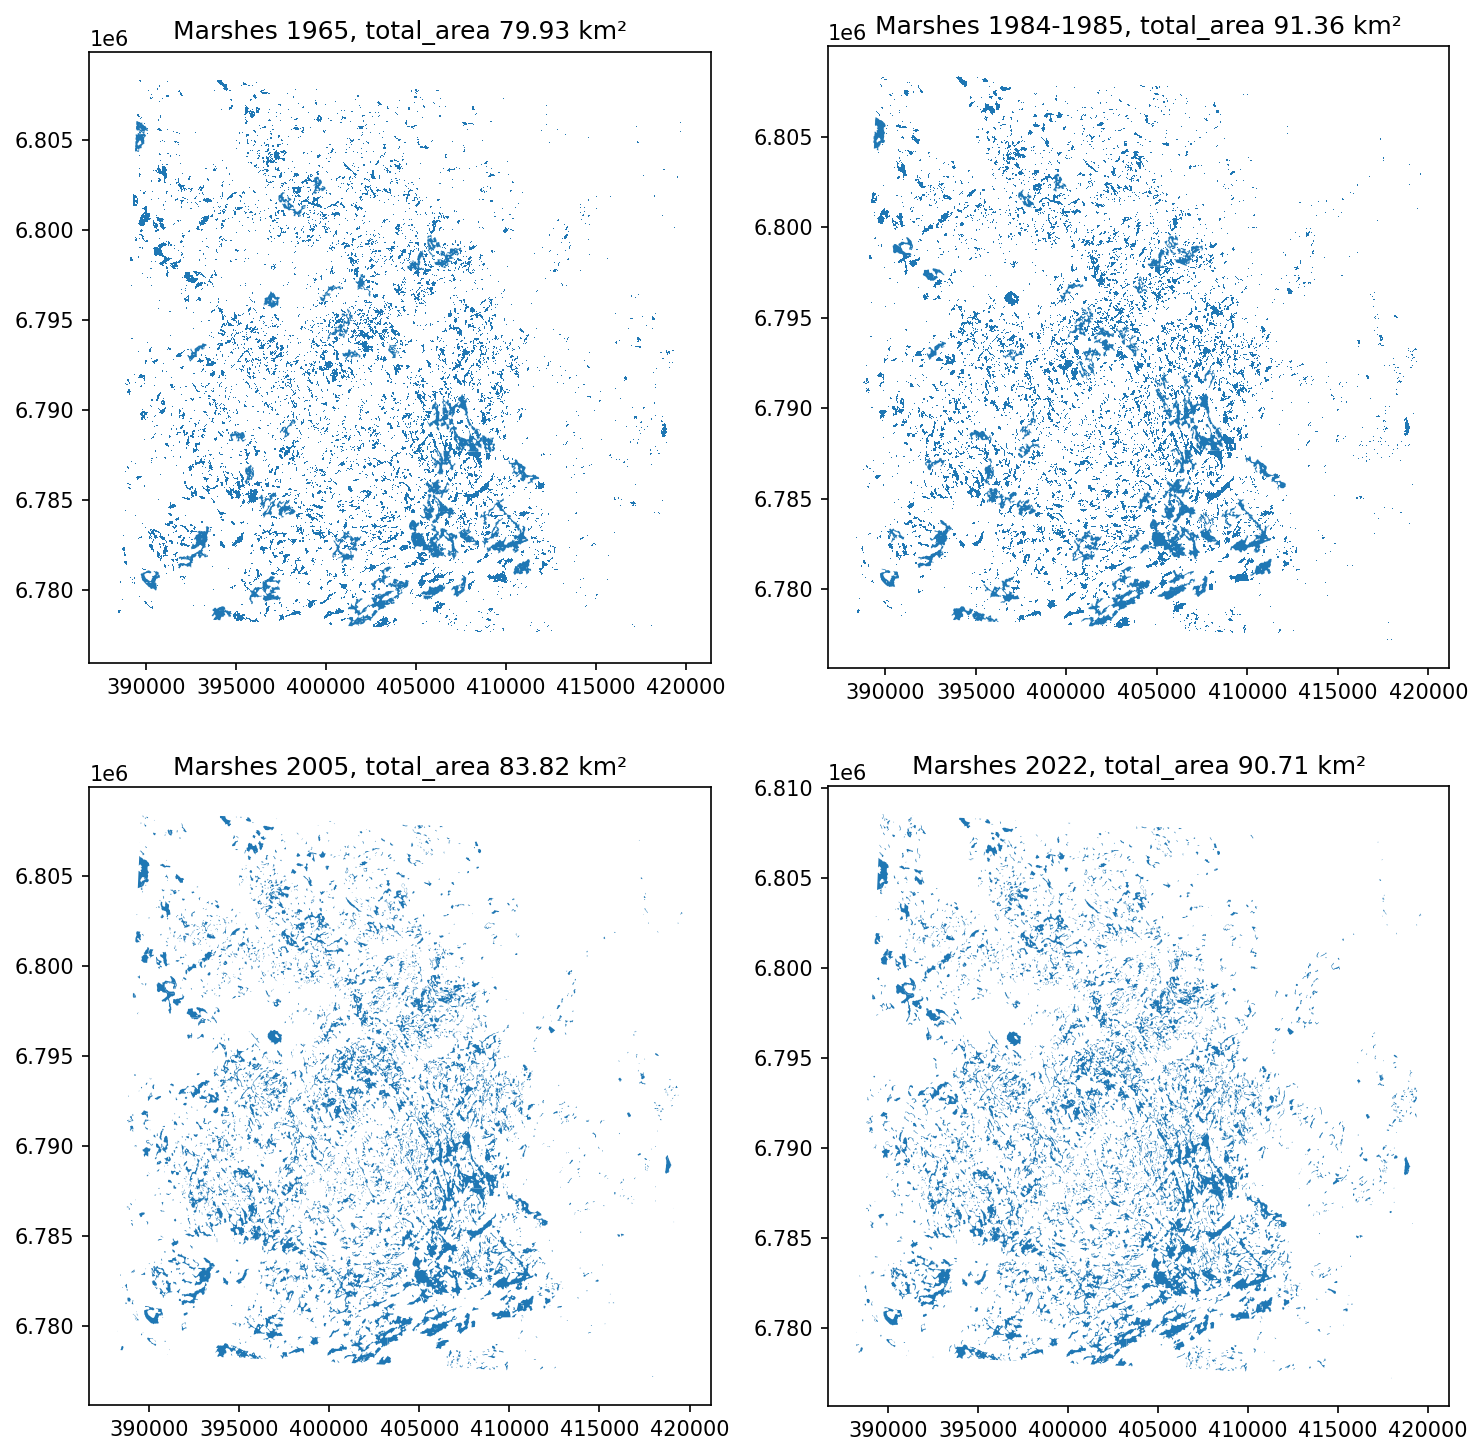

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(10,10), dpi=150)
marshes_65.plot(ax=axs[0,0], color='tab:blue')
axs[0,0].set_title(f'Marshes 1965, total_area {(marshes_65.area.sum() * 10**-6):.2f} km²')
marshes_80s.plot(ax=axs[0,1], color='tab:blue')
axs[0,1].set_title(f'Marshes 1984-1985, total_area {(marshes_80s.area.sum() * 10**-6):.2f} km²')
marshes_05.plot(ax=axs[1,0], color='tab:blue')
axs[1,0].set_title(f'Marshes 2005, total_area {(marshes_05.area.sum() * 10**-6):.2f} km²')
marshes_22.plot(ax=axs[1,1], color='tab:blue')
axs[1,1].set_title(f'Marshes 2022, total_area {(marshes_22.area.sum() * 10**-6):.2f} km²')

plt.tight_layout()

The difference between the total areas of marshes between years can be explained by more accurate mapping methods, or restoration processes.

## Waterways

In [ ]:
ww_path = Path('../results/lines/waterways/')

waterways_65 = None
waterways_80s = None

for p in os.listdir(ww_path):
    union_gdf = gpd.read_file(ww_path/p)
    if '1965' in p:
        if waterways_65 is None: waterways_65 = union_gdf
        else: waterways_65 = pd.concat((waterways_65, union_gdf))
    else:
        if waterways_80s is None: waterways_80s = union_gdf
        else: waterways_80s = pd.concat((waterways_80s, union_gdf))
waterways_65.reset_index(drop=True, inplace=True)
waterways_80s.reset_index(drop=True, inplace=True)

waterways_05 = gpd.read_file(mtk_path/'2005/waterways.geojson')
waterways_22 = gpd.read_file(mtk_path/'2022/virtavedet_2022.geojson')

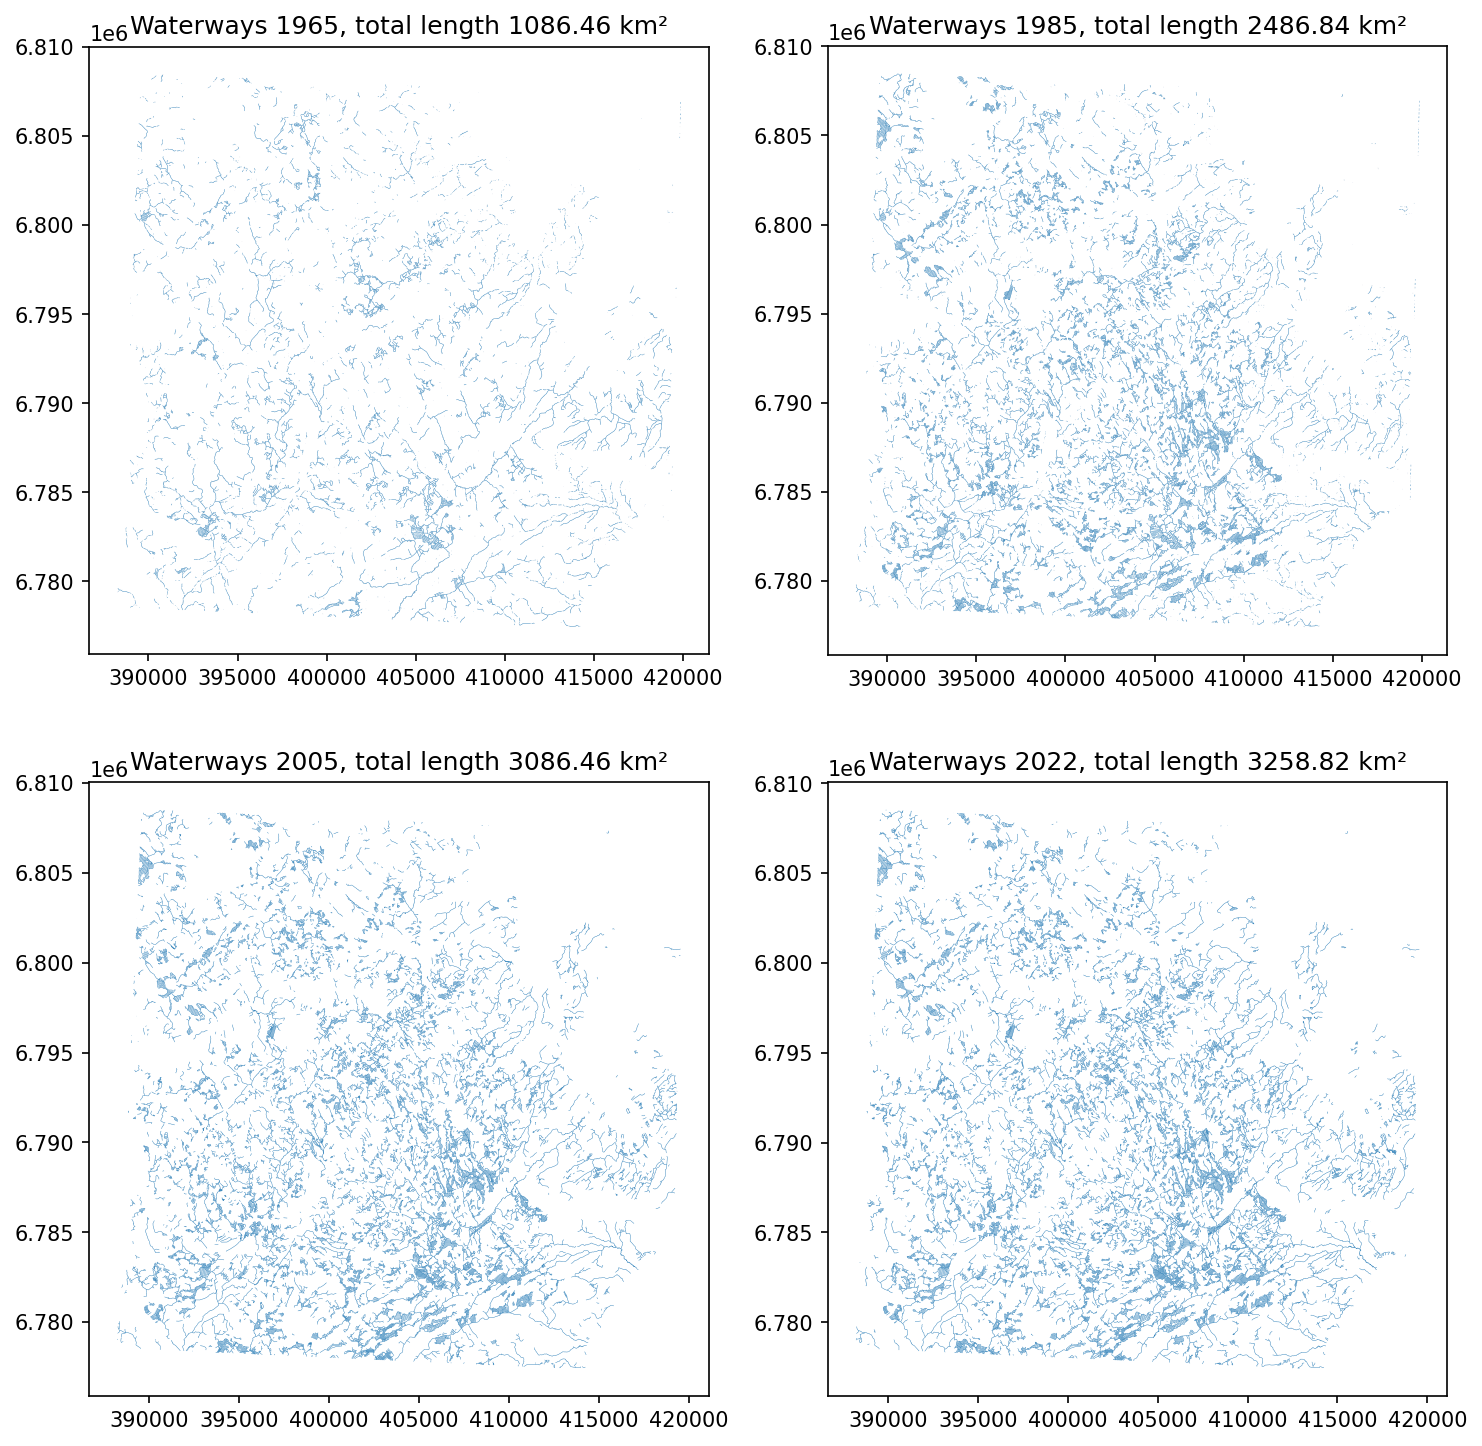

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(10,10), dpi=150)
waterways_65.plot(ax=axs[0,0], color='tab:blue', linewidth=.2)
axs[0,0].set_title(f'Waterways 1965, total length {(waterways_65.length.sum() * 10**-3):.2f} km²')
waterways_80s.plot(ax=axs[0,1], color='tab:blue', linewidth=.2)
axs[0,1].set_title(f'Waterways 1985, total length {(waterways_80s.length.sum() * 10**-3):.2f} km²')
waterways_05.plot(ax=axs[1,0], color='tab:blue', linewidth=.2)
axs[1,0].set_title(f'Waterways 2005, total length {(waterways_05.length.sum() * 10**-3):.2f} km²')
waterways_22.plot(ax=axs[1,1], color='tab:blue', linewidth=.2)
axs[1,1].set_title(f'Waterways 2022, total length {(waterways_22.length.sum() * 10**-3):.2f} km²')

plt.tight_layout()

Again, to make finding the ditching hotspots easier, aggregate the data into 500x500m grid.

In [ ]:
ww_grid = make_grid(study_area, 500)

In [ ]:
def get_len(cell, targs, sindex):
    nearest_idx = list(sindex.nearest(cell.geometry.bounds))
    tempdata = targs.iloc[nearest_idx]
    return tempdata.clip(cell.geometry).length.sum() * 10**-3

In [ ]:
ww_grid['waterway_length_65'] = ww_grid.progress_apply(lambda cell: get_len(cell, waterways_65, waterways_65.sindex), axis=1)
ww_grid['waterway_length_85'] = ww_grid.progress_apply(lambda cell: get_len(cell, waterways_80s, waterways_80s.sindex), axis=1)
ww_grid['waterway_length_05'] = ww_grid.progress_apply(lambda cell: get_len(cell, waterways_05, waterways_05.sindex), axis=1)
ww_grid['waterway_length_22'] = ww_grid.progress_apply(lambda cell: get_len(cell, waterways_22, waterways_22.sindex), axis=1)

100%|████████████████████████████████████████████████████████████████████████████| 4032/4032 [00:26<00:00, 150.08it/s]


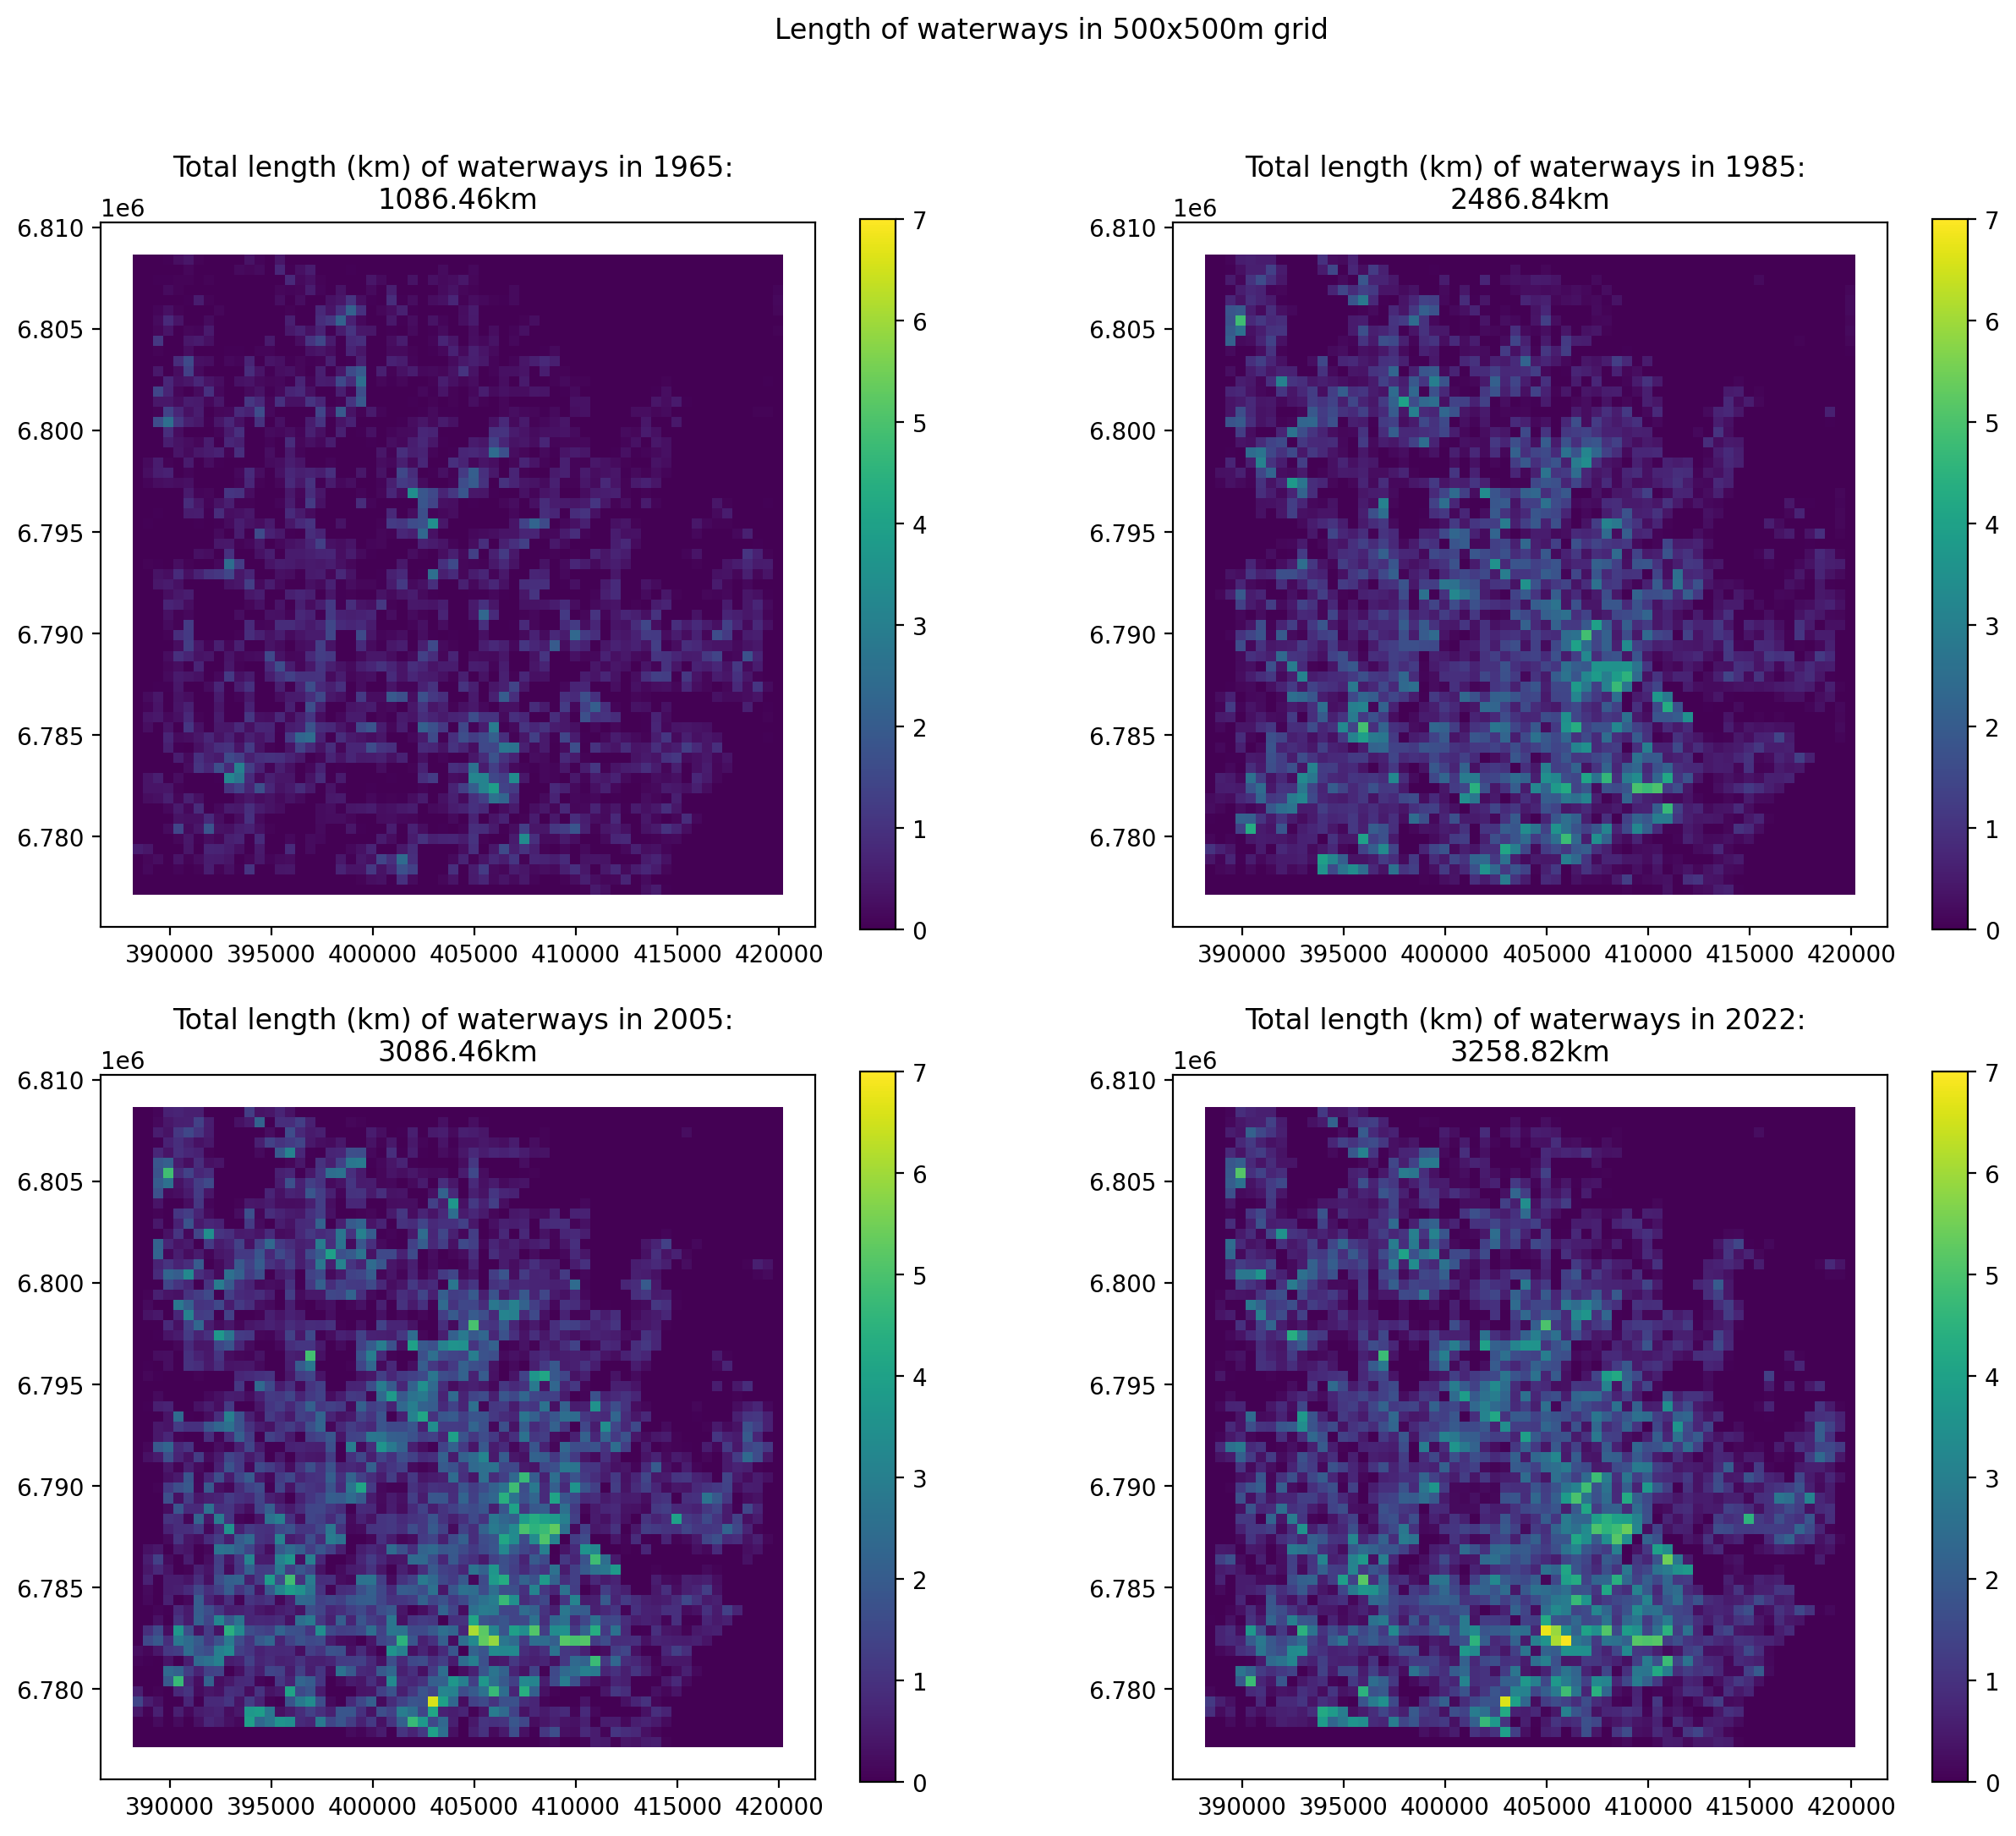

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(15,12), dpi=200)
ww_grid.plot(column='waterway_length_65', ax=axs[0,0], vmin=0, vmax=7, legend=True)
axs[0,0].set_title(f'Total length (km) of waterways in 1965: \n{ww_grid.waterway_length_65.sum() :.2f}km')
ww_grid.plot(column='waterway_length_85', ax=axs[0,1], vmin=0, vmax=7, legend=True)
axs[0,1].set_title(f'Total length (km) of waterways in 1985: \n{ww_grid.waterway_length_85.sum() :.2f}km')
ww_grid.plot(column='waterway_length_05', ax=axs[1,0], vmin=0, vmax=7, legend=True)
axs[1,0].set_title(f'Total length (km) of waterways in 2005: \n{ww_grid.waterway_length_05.sum() :.2f}km')
ww_grid.plot(column='waterway_length_22', ax=axs[1,1], vmin=0, vmax=7, legend=True)
axs[1,1].set_title(f'Total length (km) of waterways in 2022: \n{ww_grid.waterway_length_22.sum() :.2f}km')

plt.suptitle('Length of waterways in 500x500m grid')
plt.show()

Then visualize the changes between the years.

In [ ]:
ww_grid['change_65'] = (ww_grid.waterway_length_85 - ww_grid.waterway_length_65) 
ww_grid['change_85'] = (ww_grid.waterway_length_05 - ww_grid.waterway_length_85) 
ww_grid['change_05'] = (ww_grid.waterway_length_22 - ww_grid.waterway_length_05)

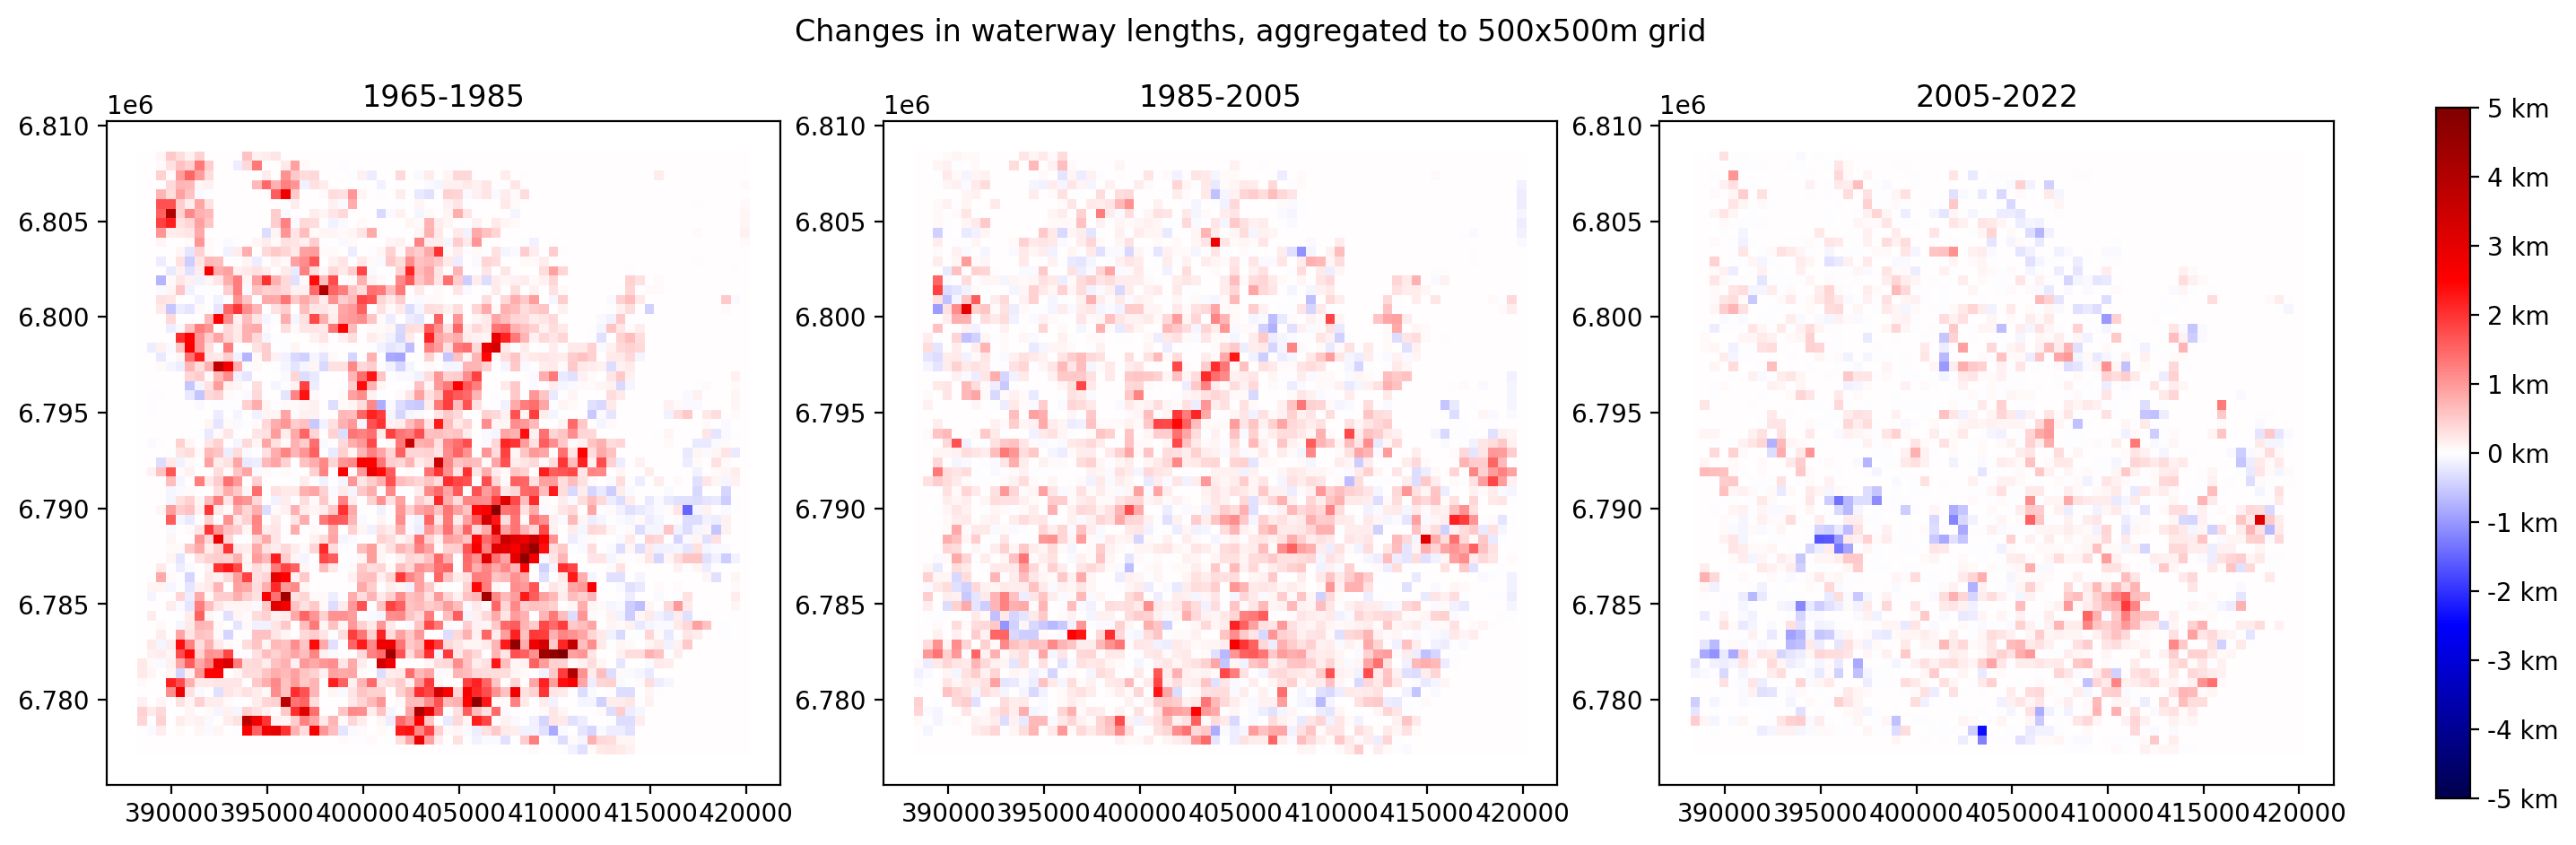

In [ ]:
import matplotlib.colors as colors

fig, axs = plt.subplots(1,4, figsize=(17,5), dpi=200, gridspec_kw={'width_ratios': [1,1,1,0.05]})
ww_grid.plot(column='change_65', ax=axs[0], vmin=-5, vmax=5, cmap='seismic')
ww_grid.plot(column='change_85', ax=axs[1], vmin=-5, vmax=5, cmap='seismic')
ww_grid.plot(column='change_05', ax=axs[2], vmin=-5, vmax=5, cmap='seismic')
axs[0].set_title('1965-1985')
axs[1].set_title('1985-2005')
axs[2].set_title('2005-2022')

norm = colors.Normalize(vmin=-5,vmax=5)
sm = plt.cm.ScalarMappable(cmap='seismic', norm=norm)
ticks = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
cbar = plt.colorbar(sm, cax=axs[3], ticks=ticks)
cbar.ax.set_yticklabels([f'{t} km' for t in ticks])
plt.suptitle('Changes in waterway lengths, aggregated to 500x500m grid')
plt.show()

Visualize the locations where there has been the most decrease in waterway length between 1965 and 1985.

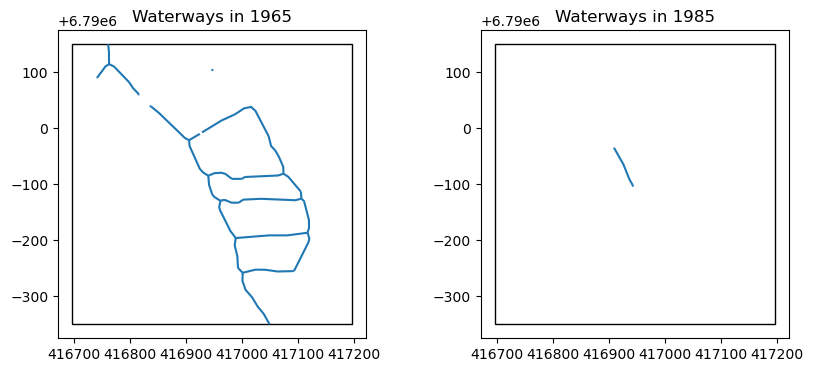

In [ ]:
wwloss_85 = ww_grid[ww_grid.change_65 == ww_grid.change_65.min()].geometry.iloc[0]
fig, axs = plt.subplots(1,2, figsize=(10,4))
ww_grid[ww_grid.change_65 == ww_grid.change_65.min()].plot(ax=axs[0], facecolor='none')
waterways_65.clip(wwloss_85).plot(ax=axs[0], color='tab:blue').set_title('Waterways in 1965')
ww_grid[ww_grid.change_65 == ww_grid.change_65.min()].plot(ax=axs[1], facecolor='none')
waterways_80s.clip(wwloss_85).plot(ax=axs[1], color='tab:blue').set_title('Waterways in 1985')
plt.show()

Same for 1985 and 2005

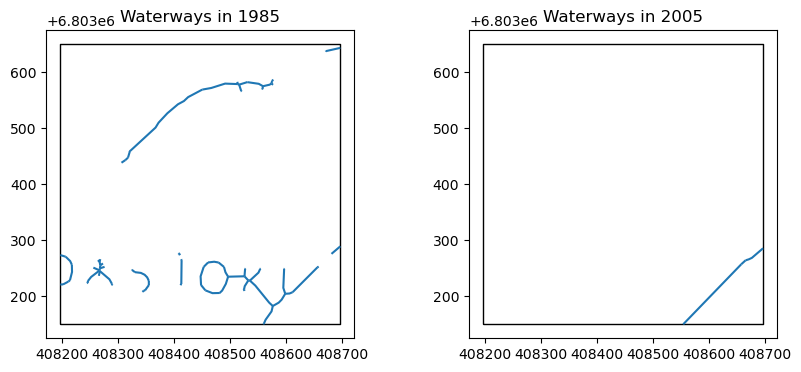

In [ ]:
wwloss_05 = ww_grid[ww_grid.change_85 == ww_grid.change_85.min()].geometry.iloc[0]
fig, axs = plt.subplots(1,2, figsize=(10,4))
ww_grid[ww_grid.change_85 == ww_grid.change_85.min()].plot(ax=axs[0], facecolor='none')
waterways_80s.clip(wwloss_05).plot(ax=axs[0], color='tab:blue').set_title('Waterways in 1985')
ww_grid[ww_grid.change_85 == ww_grid.change_85.min()].plot(ax=axs[1], facecolor='none')
waterways_05.clip(wwloss_05).plot(ax=axs[1], color='tab:blue').set_title('Waterways in 2005')
plt.show()

Seems that some text has been erroneously classified as waterways.

And then same visualizations for waterway length increase.

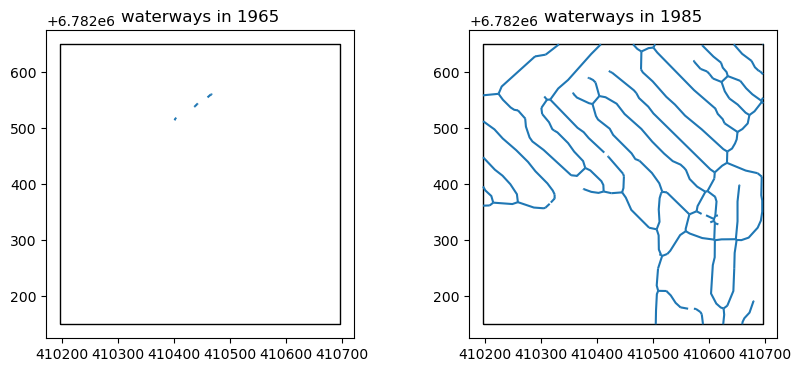

In [ ]:
wwgain_85 = ww_grid[ww_grid.change_65 == ww_grid.change_65.max()].geometry.iloc[0]
fig, axs = plt.subplots(1,2, figsize=(10,4))
ww_grid[ww_grid.change_65 == ww_grid.change_65.max()].plot(ax=axs[0], facecolor='none')
ww_grid[ww_grid.change_65 == ww_grid.change_65.max()].plot(ax=axs[1], facecolor='none')
waterways_65.clip(wwgain_85).plot(ax=axs[0], color='tab:blue').set_title('waterways in 1965')
waterways_80s.clip(wwgain_85).plot(ax=axs[1], color='tab:blue').set_title('waterways in 1985')
plt.show()

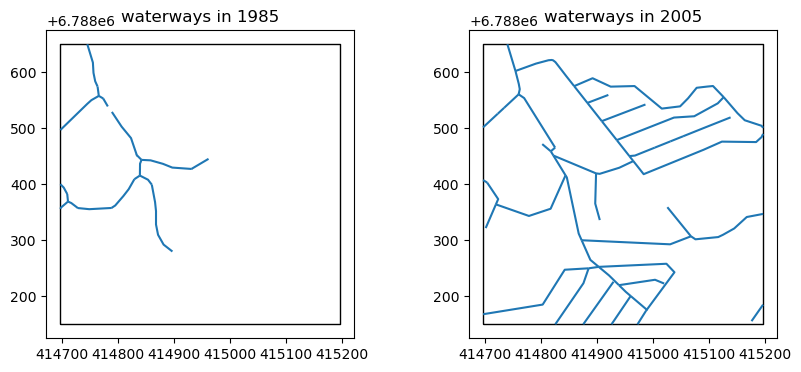

In [ ]:
wwgain_05 = ww_grid[ww_grid.change_85 == ww_grid.change_85.max()].geometry.iloc[0]
fig, axs = plt.subplots(1,2, figsize=(10,4))
ww_grid[ww_grid.change_85 == ww_grid.change_85.max()].plot(ax=axs[0], facecolor='none')
waterways_80s.clip(wwgain_05).plot(ax=axs[0], color='tab:blue').set_title('waterways in 1985')
ww_grid[ww_grid.change_85 == ww_grid.change_85.max()].plot(ax=axs[1], facecolor='none')
waterways_05.clip(wwgain_05).plot(ax=axs[1], color='tab:blue').set_title('waterways in 2005')
plt.show()

### Marsh-waterway -combinations

Instead of rectangular grid, the waterway change indicating ditching or restoration can be visualized for marsh areas. In this example, we use the marsh layer from 1965 maps as the aggregation layer.

In [ ]:
marshes_65['drainage_len_65'] = marshes_65.progress_apply(lambda row: get_len(row, waterways_65, waterways_65.sindex), axis=1)
marshes_65['drainage_len_85'] = marshes_65.progress_apply(lambda row: get_len(row, waterways_80s, waterways_80s.sindex), axis=1)
marshes_65['drainage_len_05'] = marshes_65.progress_apply(lambda row: get_len(row, waterways_05, waterways_05.sindex), axis=1)
marshes_65['drainage_len_22'] = marshes_65.progress_apply(lambda row: get_len(row, waterways_22, waterways_22.sindex), axis=1)

100%|████████████████████████████████████████████████████████████████████████████| 7981/7981 [00:40<00:00, 198.69it/s]


In [ ]:
marshes_65['drain_change_65'] = (marshes_65.drainage_len_85 - marshes_65.drainage_len_65)
marshes_65['drain_change_85'] = (marshes_65.drainage_len_05 - marshes_65.drainage_len_85)
marshes_65['drain_change_05'] = (marshes_65.drainage_len_22 - marshes_65.drainage_len_05)

Filter out the marsh where the ditching has been the most aggressive between 1965 and 1985.

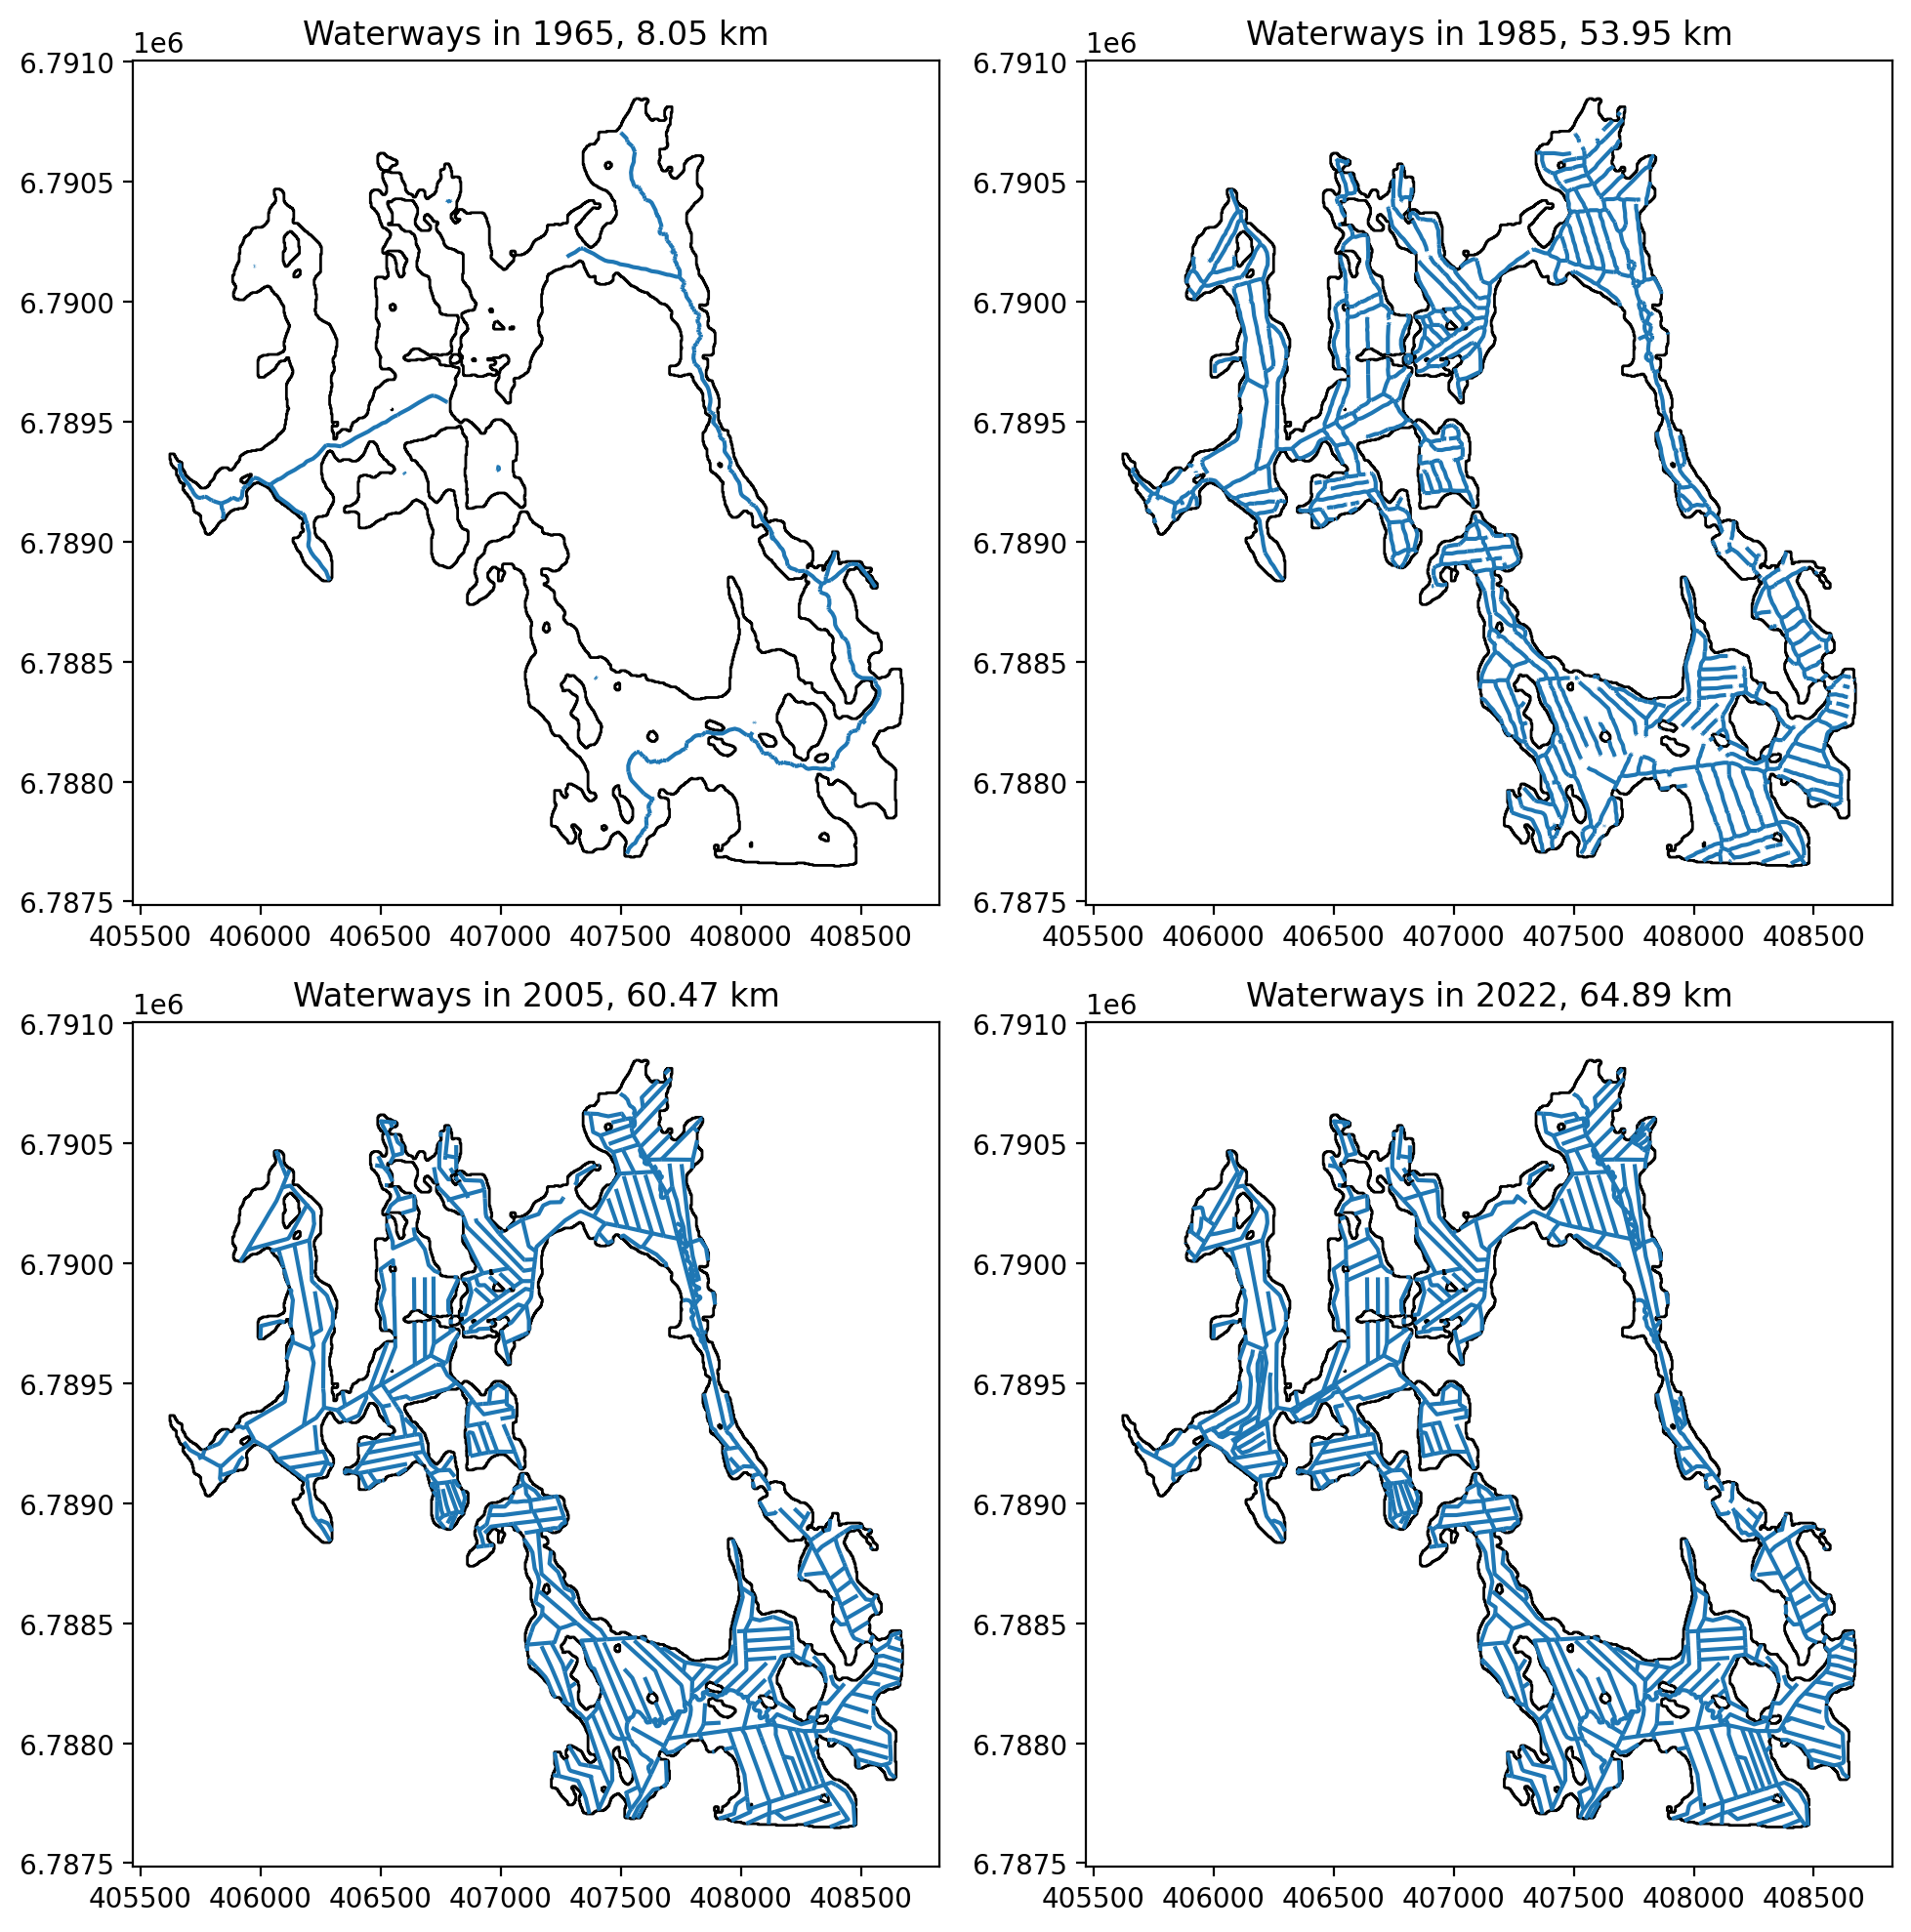

In [ ]:
largest_marsh = marshes_65[marshes_65.drain_change_65 > 45].geometry.iloc[0]
fig, axs = plt.subplots(2,2, dpi=200, figsize=(10,10))
marshes_65[marshes_65.drain_change_65 > 45].plot(ax=axs[0,0], facecolor='none')
marshes_65[marshes_65.drain_change_65 > 45].plot(ax=axs[0,1], facecolor='none')
marshes_65[marshes_65.drain_change_65 > 45].plot(ax=axs[1,0], facecolor='none')
marshes_65[marshes_65.drain_change_65 > 45].plot(ax=axs[1,1], facecolor='none')

waterways_65.clip(largest_marsh).plot(ax=axs[0,0])
waterways_80s.clip(largest_marsh).plot(ax=axs[0,1])
waterways_05.clip(largest_marsh).plot(ax=axs[1,0])
waterways_22.clip(largest_marsh).plot(ax=axs[1,1])

axs[0,0].set_title(f'Waterways in 1965, {waterways_65.clip(largest_marsh).length.sum()*10**-3:.2f} km')
axs[0,1].set_title(f'Waterways in 1985, {waterways_80s.clip(largest_marsh).length.sum()*10**-3:.2f} km')
axs[1,0].set_title(f'Waterways in 2005, {waterways_05.clip(largest_marsh).length.sum()*10**-3:.2f} km')
axs[1,1].set_title(f'Waterways in 2022, {waterways_22.clip(largest_marsh).length.sum()*10**-3:.2f} km')

plt.tight_layout()

## Water bodies

Even though water bodies don't change that much, let's visualize them for completeness.

In [ ]:
for r in results:
    polygonize(respath/r, polypath/'waterbodies'/r.replace('tif', 'geojson'), target_class=5, scale_factor=1/2)

In [ ]:
waterbodies_65 = None
waterbodies_80s = None

for p in os.listdir(polypath/'waterbodies'):
    union_gdf = gpd.read_file(polypath/'waterbodies'/p)
    if '1965' in p:
        if waterbodies_65 is None: waterbodies_65 = union_gdf
        else: waterbodies_65 = pd.concat((waterbodies_65, union_gdf))
    else:
        if waterbodies_80s is None: waterbodies_80s = union_gdf
        else: waterbodies_80s = pd.concat((waterbodies_80s, union_gdf))
waterbodies_65.reset_index(inplace=True, drop=True)
waterbodies_80s.reset_index(inplace=True, drop=True)

waterbodies_05 = gpd.read_file(mtk_path/'2005/waterbodies.geojson')
waterbodies_22 = gpd.read_file(mtk_path/'2022/jarvet_2022.geojson')

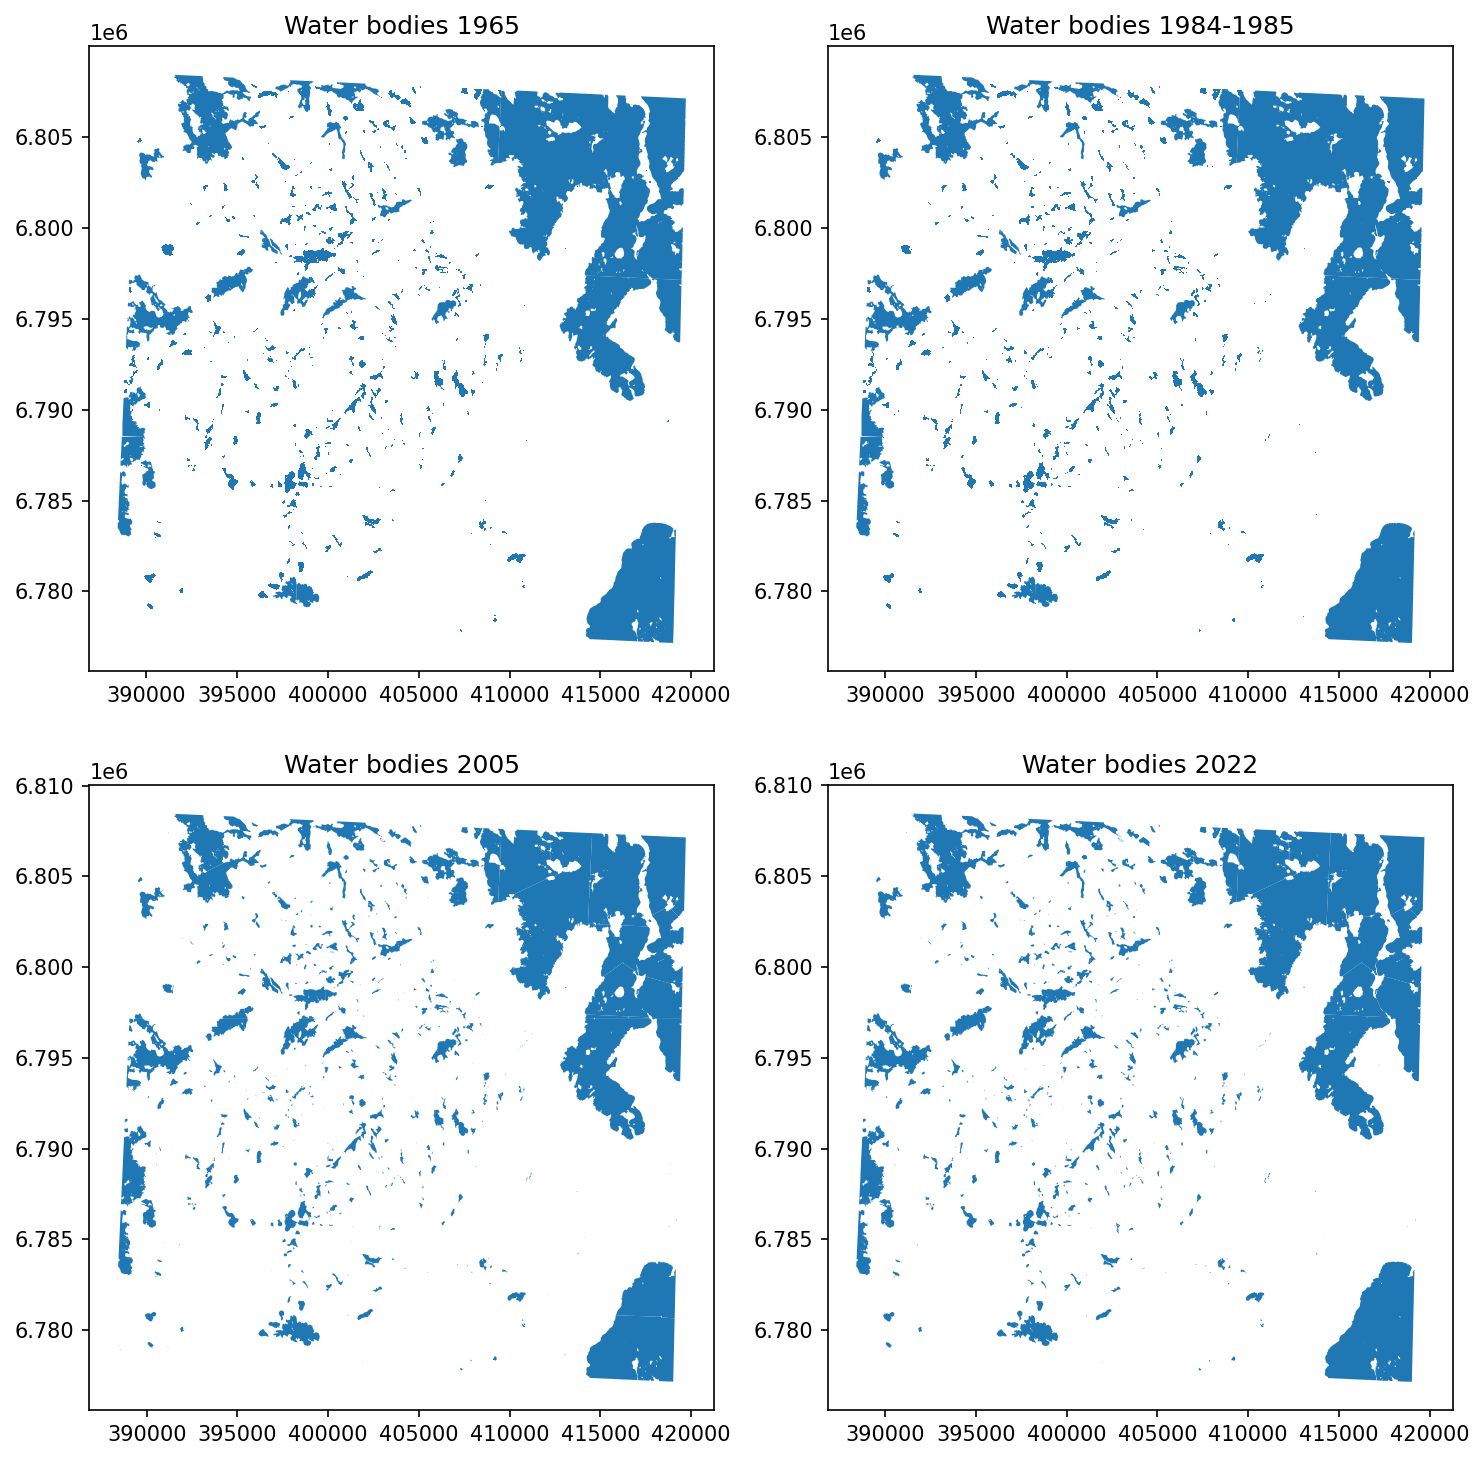

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(10,10), dpi=150)
waterbodies_65.plot(ax=axs[0,0], color='tab:blue')
axs[0,0].set_title('Water bodies 1965')
waterbodies_80s.plot(ax=axs[0,1], color='tab:blue')
axs[0,1].set_title('Water bodies 1984-1985')
waterbodies_05.plot(ax=axs[1,0], color='tab:blue')
axs[1,0].set_title('Water bodies 2005')
waterbodies_22.plot(ax=axs[1,1], color='tab:blue')
axs[1,1].set_title('Water bodies 2022')
plt.tight_layout()